# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [3]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite
def Bayes1a(X_train, Y_train, X_test):
    feature_dim = int (np.shape(X_train[0])[0])
    pos_points = np.sum(Y_train == 1)
    neg_points = np.sum(Y_train == -1)
    X_train_pos=np.empty([0,feature_dim],dtype=float)
    X_train_neg=np.empty([0,feature_dim],dtype=float)

    for (X,Y) in zip(X_train,Y_train):
        if Y== -1.0:
            X_train_neg= np.vstack([X_train_neg,X])
        else:
            X_train_pos= np.vstack([X_train_pos,X])
    positive_mean = np.mean(X_train_pos, axis=0)
    negative_mean = np.mean(X_train_neg, axis=0)


    Prob_pos= (pos_points/(pos_points+neg_points))
    Prob_neg= (neg_points/(pos_points+neg_points))
    Y_test = np.empty([0],dtype=float)

    for X in X_test:
        X_mean_pos = X - positive_mean
        X_mean_transpose = np.transpose(X_mean_pos)

        class_prob_pos = np.power((1/(2*np.pi)),feature_dim/2)* np.exp((-.5)*(np.matmul(X_mean_transpose,X_mean_pos)))
        X_mean_neg = X - negative_mean
        X_mean_tranpose = np.transpose(X_mean_neg)
        class_prob_neg = np.power((1/(2*np.pi)),feature_dim/2)* np.exp((-.5)*(np.matmul(X_mean_transpose,X_mean_neg)))

        posterior_pos = Prob_pos*class_prob_pos
        posterior_neg = Prob_neg*class_prob_neg

        if(posterior_pos >= posterior_neg):
            Y_test=np.append(Y_test,1)
        else :
            Y_test=np.append(Y_test,-1)

    return Y_test

def Bayes1b(X_train, Y_train, X_test):
    feature_dim = int (np.shape(X_train[0])[0])
    pos_points = np.sum(Y_train == 1)
    neg_points = np.sum(Y_train == -1)

    X_train_pos=np.empty([0,feature_dim],dtype=float)
    X_train_neg=np.empty([0,feature_dim],dtype=float)
    # arrange pos,neg point seaprate array
    for (X,Y) in zip(X_train,Y_train):
        if Y== -1.0:
            X_train_neg= np.vstack([X_train_neg,X])
        else:
            X_train_pos= np.vstack([X_train_pos,X])
    #calculate mean for each feature column
    positive_means = np.mean(X_train_pos, axis=0)
    negative_means = np.mean(X_train_neg, axis=0)

    cov_matrix = np.cov(np.transpose(X_train))
    cov_inverse = np.linalg.inv(cov_matrix)

    Y_test = np.empty([0],dtype=float)

    Prob_pos= (pos_points/(pos_points+neg_points))
    Prob_neg= (neg_points/(pos_points+neg_points))

    for X in X_test:
        X_mean_pos = X - positive_means
        X_mean_tran_pos = np.transpose(X_mean_pos)
        class_prob_pos = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_matrix),-(.5))* np.exp((-.5)*np.matmul(X_mean_tran_pos,np.matmul(cov_inverse,X_mean_pos)))

        X_mean_neg = X - negative_means
        X_mean_tran_neg = np.transpose(X_mean_neg)
        class_prob_neg = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_matrix),-(.5))* np.exp((-.5)*np.matmul(X_mean_tran_neg,np.matmul(cov_inverse,X_mean_neg)))
        posterior_pos = Prob_pos*class_prob_pos
        posterior_neg = Prob_neg*class_prob_neg

        if(posterior_pos >= posterior_neg):
            Y_test=np.append(Y_test,1)
        else :
            Y_test=np.append(Y_test,-1)

    return Y_test

def Bayes1c(X_train, Y_train, X_test):
    feature_dim = int (np.shape(X_train[0])[0])
    pos_points = np.sum(Y_train == 1)
    neg_points = np.sum(Y_train == -1)

    X_train_pos=np.empty([0,feature_dim],dtype=float)
    X_train_neg=np.empty([0,feature_dim],dtype=float)
    # arrange pos,neg point seaprate array
    for (X,Y) in zip(X_train,Y_train):
        if Y== -1.0:
            X_train_neg= np.vstack([X_train_neg,X])
        else:
            X_train_pos= np.vstack([X_train_pos,X])
    #calculate mean for each feature column
    positive_means = np.mean(X_train_pos, axis=0)
    negative_means = np.mean(X_train_neg, axis=0)

    cov_pos = np.cov(np.transpose(X_train_pos),bias=True)
    cov_neg = np.cov(np.transpose(X_train_neg),bias=True)

    cov_inverse_pos=np.linalg.inv(cov_pos)
    cov_inverse_neg=np.linalg.inv(cov_neg)
    Y_test = np.empty([0],dtype=float)

    Prob_pos= (pos_points/(pos_points+neg_points))
    Prob_neg= (neg_points/(pos_points+neg_points))

    for X in X_test:
      #for each data point caclute X-mu
        X_mean_pos = X - positive_means
        X_mean_tran_pos = np.transpose(X_mean_pos)
        class_prob_pos = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_pos),-(.5))* np.exp((-.5)*np.matmul(X_mean_tran_pos,np.matmul(cov_inverse_pos,X_mean_pos)))

        X_mean_neg = X - negative_means
        X_mean_tran_neg = np.transpose(X_mean_neg)
        class_prob_neg = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_neg),-(.5))* np.exp((-.5)*np.matmul(X_mean_tran_neg,np.matmul(cov_inverse_neg,X_mean_neg)))
        posterior_pos = Prob_pos*class_prob_pos
        posterior_neg = Prob_neg*class_prob_neg

        if(posterior_pos >= posterior_neg):
            Y_test=np.append(Y_test,1)
        else :
            Y_test=np.append(Y_test,-1)

    return Y_test






In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


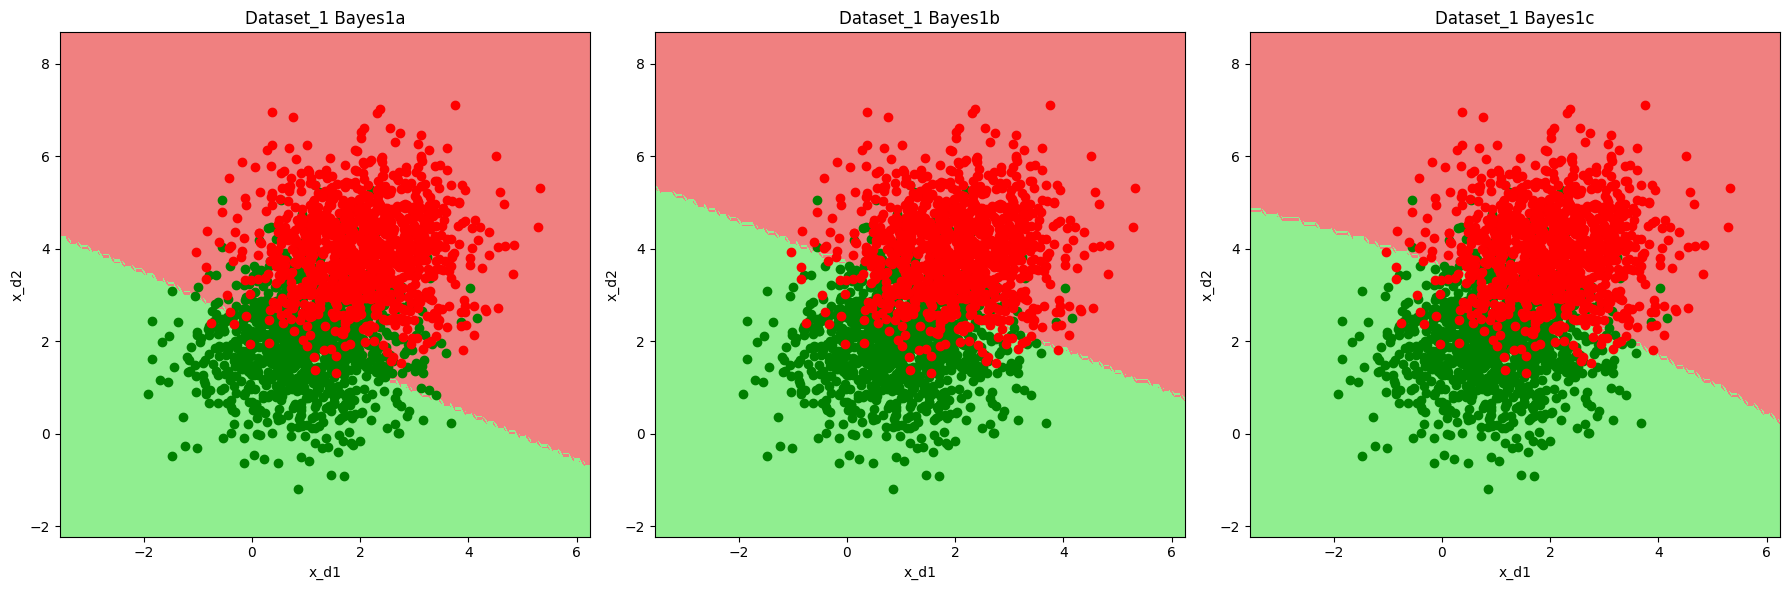

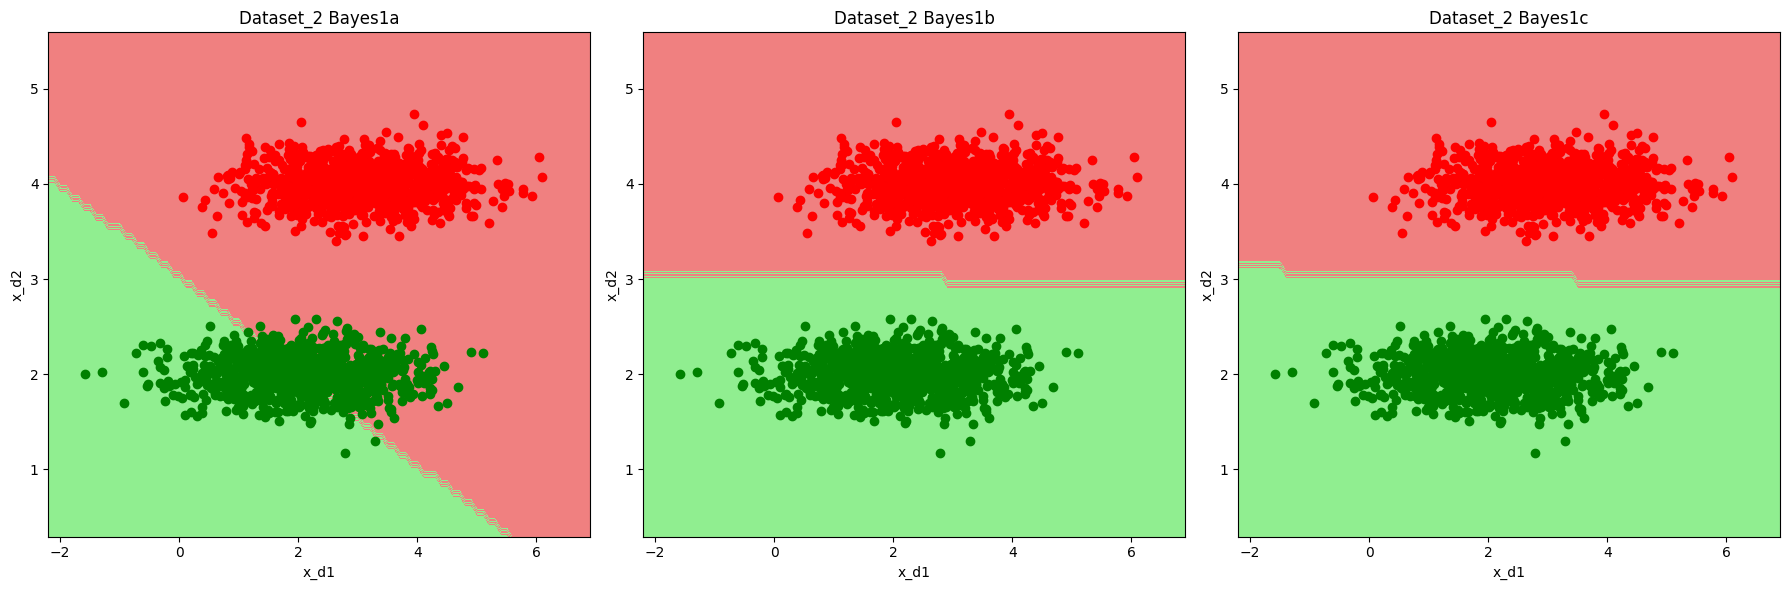

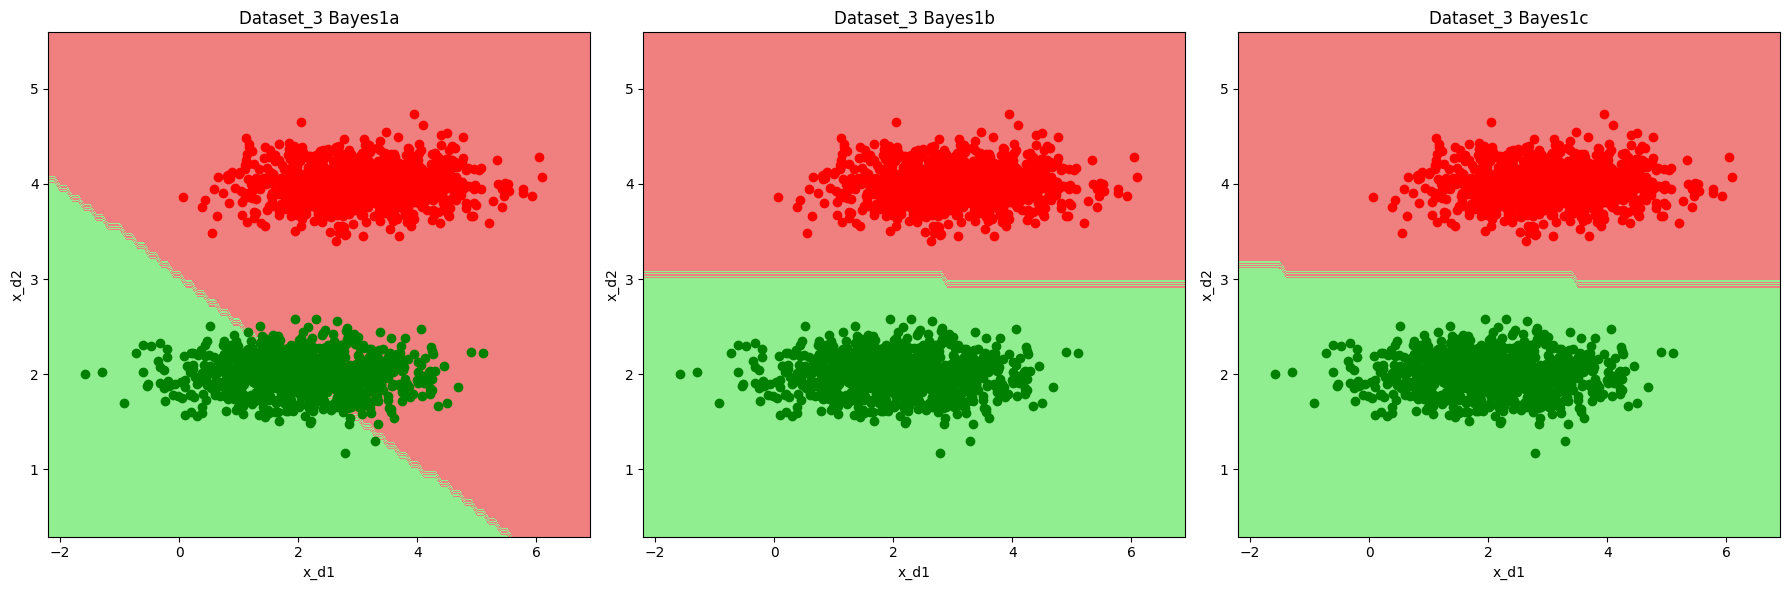

In [ ]:
def plot_classifiers(data, dataset_num):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']

    min1, max1 = X_test[:, 0].min()-1, X_test[:, 0].max()+1
    min2, max2 = X_test[:, 1].min()-1, X_test[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    grid = np.c_[xx.ravel(), yy.ravel()]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, bayes_func in enumerate([Bayes1a, Bayes1b, Bayes1c]):
        ax = axes[i]

        Y_pred_grid = bayes_func(X_train, Y_train, grid).reshape(xx.shape)
        ax.contourf(xx, yy, Y_pred_grid, colors=['lightcoral', 'lightgreen'])

        ax.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], color='green', label='Positive Class')
        ax.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], color='red', label='Negative Class')

        ax.set_title(f'Dataset_{dataset_num} Bayes1{chr(97 + i)}')
        ax.set_xlabel('x_d1')
        ax.set_ylabel('x_d2')

    plt.tight_layout()
    plt.show()

# Load and plot datasets
data_paths = ['../../Data/dataset1_1.npz',
              '../../Data/dataset1_2.npz',
              '../../Data/dataset1_2.npz']

for i, path in enumerate(data_paths, start=1):
    data = np.load(path)
    plot_classifiers(data, i)

###  <center><font color='Red'> Test Error Rate table </font>  </center>
|Error|Bayes1a | Bayes1b | Bayes1c|
|-----|----------|----------|----------|
Data1_1    | 0.126  | 0.125  | .125  |
Data1_2    | 0.099  | 0.0   | 0.0   |
Data1_3    | 0.492   | 0.495   | 0.135   |

<br>
<b>Observations</b><br>

i) Upon observing the plots, it appears that the data from dataset1_1 follows a Gaussian distribution with an identity covariance matrix. Consequently, all Bayes1 classifiers yield nearly identical training and test errors.

ii) Notably, dataset1_2 exhibits linear separability and displays similar variance across classes, as evident from their distributions. As a result, Bayes1_b achieves zero classification error, while Bayes1_c also attains perfect classification. However, Bayes1_a, making slightly stronger assumptions about the data, incurs some errors in classifying dataset1_2.

iii) The plot for dataset1_3 indicates significant disparities in the variances between the distributions of the two classes. Consequently, Bayes1_c demonstrates superior classification performance with lower training and test errors compared to other Bayes1 classifiers


** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:


Loss_matrix = np.matrix([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

def Bayes2a(X_train, Y_train, X_test):
    feature=X_train.shape[1]
    tot_class= len(np.unique(Y_train))
    prior_probs=np.zeros(tot_class+1)
    class_means = np.zeros((tot_class+1, feature))
    [n,] = Y_train.shape
    for c in range(1,tot_class+1):
        prior_probs[c] = np.count_nonzero(Y_train == c)/n
        class_means[c] = np.mean(X_train[Y_train == c], axis=0)

    predicted_probs = np.zeros((X_test.shape[0], tot_class))

    for i, x in enumerate(X_test):
        for j in range(1,tot_class+1):
            # Compute probability density function for each class
            likelihood = np.exp(-0.5 * np.sum((x - class_means[j])**2))
            predicted_probs[i, j-1] = likelihood * prior_probs[j]
    y_pred = np.argmin(np.dot(predicted_probs,np.transpose(Loss_matrix)), axis=1)+1
    return y_pred

def Bayes2b(X_train, Y_train, X_test):
    feature_dim=X_train.shape[1]
    tot_class= len(np.unique(Y_train))
    prior_probs=np.zeros(tot_class+1)
    class_means = np.zeros((tot_class+1, feature_dim))
    [n,] = Y_train.shape
    for c in range(1,tot_class+1):
        prior_probs[c] = np.count_nonzero(Y_train == c)/n
        class_means[c] = np.mean(X_train[Y_train == c], axis=0)

    predicted_probs = np.zeros((X_test.shape[0], tot_class))
    cov_matrix = np.cov(np.transpose(X_train))
    cov_inverse = np.linalg.inv(cov_matrix)
    for i, x in enumerate(X_test):
        for j in range(1,tot_class+1):
            X_mean_classes=x-class_means[j]
            X_mean_classes_trans=np.transpose(X_mean_classes)
            class_prob = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_matrix),-(.5))* np.exp((-.5)*np.matmul(X_mean_classes_trans,np.matmul(cov_inverse,X_mean_classes)))
            predicted_probs[i, j-1] = class_prob * prior_probs[j]
    y_pred = np.argmin(np.dot(predicted_probs,np.transpose(Loss_matrix)), axis=1)+1
    return y_pred

def Bayes2c(X_train, Y_train, X_test):
    feature_dim=X_train.shape[1]
    tot_class= len(np.unique(Y_train))
    prior_probs=np.zeros(tot_class)
    class_means = np.zeros((tot_class, feature_dim))
    cov_matrix = []
    [n,] = Y_train.shape
    for c in range(1,tot_class+1):
        prior_probs[c-1] = np.count_nonzero(Y_train == c)/n
        class_means[c-1] = np.mean(X_train[Y_train == c], axis=0)
        cov_matrix.append(np.cov(np.transpose(X_train[Y_train == c])))

    predicted_probs = np.zeros((X_test.shape[0], tot_class))

    for i, x in enumerate(X_test):
        for j in range(tot_class):
            # Compute probability density function for each class
            X_mean_classes=x-class_means[j]
            X_mean_classes_trans=np.transpose(X_mean_classes)
            cov_inverse = np.linalg.inv(cov_matrix[j])
            class_prob = np.power((1/(2*np.pi)),feature_dim/2)*np.power(np.linalg.det(cov_matrix[j]),-(.5))* np.exp((-.5)*np.matmul(X_mean_classes_trans,np.matmul(cov_inverse,X_mean_classes)))
            predicted_probs[i, j] = class_prob * prior_probs[j]

    y_pred = np.argmin(np.dot(predicted_probs,np.transpose(Loss_matrix)), axis=1)+1
    return y_pred




In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


<Figure size 640x480 with 0 Axes>

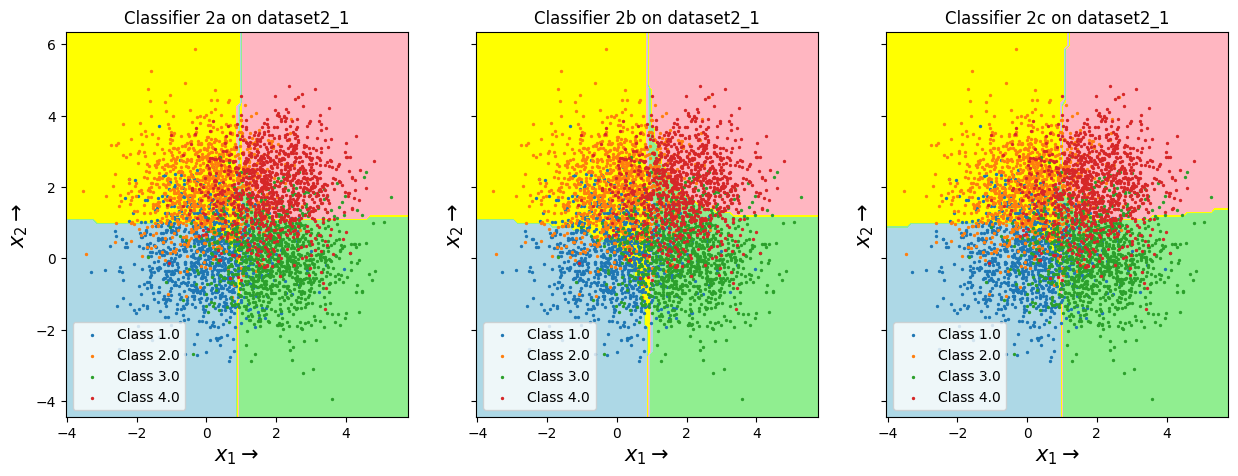

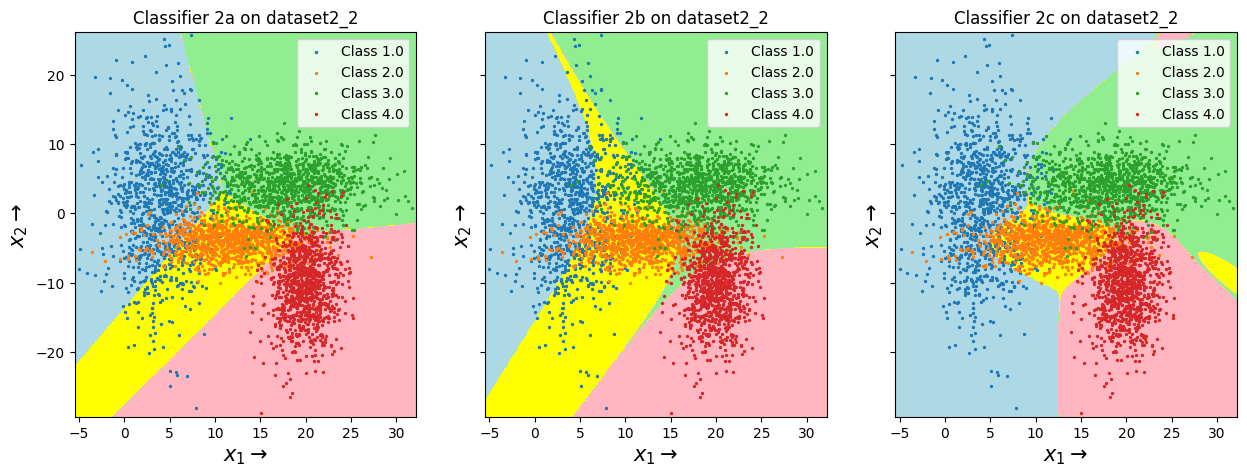

In [ ]:
def plot_results(datasets):
    for i, (dataset_name, dataset) in enumerate(datasets.items()):
        X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']

        # Generate meshgrid for contour plotting
        X_min = np.min(X_train, axis=0)
        X_max = np.max(X_train, axis=0)
        X, Y = np.meshgrid(np.arange(X_min[0]-0.5, X_max[0]+0.5, 0.1), np.arange(X_min[1]-0.5, X_max[1]+0.5, 0.1))
        samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

        # Compute classifier outputs
        Z_a = Bayes2a(X_train, Y_train, samples)
        Z_b = Bayes2b(X_train, Y_train, samples)
        Z_c = Bayes2c(X_train, Y_train, samples)

        # Plotting
        plt.figure(i)
        f, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(15, 5))
        classifiers = {'Classifier 2a': Z_a, 'Classifier 2b': Z_b, 'Classifier 2c': Z_c}
        for ax, (clf_name, Z) in zip(axes, classifiers.items()):
            Z = Z.reshape(X.shape)
            ax.contourf(X, Y, Z, colors=['#ADD8E6', '#90EE90', '#FFFF00', '#FFB6C1'])
            for class_label in np.unique(Y_train):
                ax.scatter(X_train[Y_train == class_label][:, 0], X_train[Y_train == class_label][:, 1], s=2, label=f'Class {class_label}')
            ax.set_title(f'{clf_name} on {dataset_name}')
            ax.legend()
            ax.set_xlabel(r'$x_{1}\rightarrow$', size=15)
            ax.set_ylabel(r'$x_{2}\rightarrow$', size=15)

    plt.show()
# Define datasets
datasets = {'dataset2_1': np.load('../../Data/dataset2_1.npz'),
            'dataset2_2': np.load('../../Data/dataset2_2.npz')}

# Plot results
plot_results(datasets)



<b>Observations:</b>

(i)The classifiers and data are structured similarly to those in Problem 1. Classifiers 2a and 2b are tailored to handle linearly separable regions, with the latter utilizing the same covariance matrix. Conversely, 2c exhibits superior performance in handling non-linear regions owing to its distinct matrix utilization.

(ii)Based on the error analysis, it can be deduced that 2a performs the poorest (with 2b showing similar performance), while 2c outperforms them in Dataset 2_1.

<center>
<b>Error Formula= (loss per missclassified point)/(total number of points)</b></center>

###  <center><font color='Red'> Error table </font>  </center>

| Dataset No. | Bayes 2a Loss | Bayes 2b Loss | Bayes 2c Loss |
|-------------|----------------|----------------|----------------|
| Dataset 2_1   |   0.4298     |   0.4575      |   0.4280      |
| Dataset 2_2   |   0.1835       |   0.2102       |   0.1405      |

</center>

####  <center><font color='Red'> Confusion Matrix </font>  </center>

<center>
 <b>Dataset 2_1</b>
<center>
<center><b>Bayes 2a</b>    
</center>

| Actual\Predicted | Y=1  | Y=2  | Y=3  | Y=4  |
|------------------|------|------|------|------|
| Y=1              | 633  | 219  | 136  | 12   |
| Y=2              | 97   | 738  | 62   | 103  |
| Y=3              | 86   | 49   | 770  | 95   |
| Y=4              | 15   | 136  | 194  | 655  |

<center><b>Bayes 2b</b>  
</center>   
    
| Actual\Predicted | Y=1  | Y=2  | Y=3  | Y=4  |
|------------------|------|------|------|------|
| Y=1              | 463  | 388  | 145  | 4    |
| Y=2              | 43   | 791  | 113  | 53   |
| Y=3              | 40   | 95   | 818  | 47   |
| Y=4              | 4    | 149  | 346  | 501  |

<center><b>Bayes 2c</b>  

| Actual\Predicted | Y=1  | Y=2  | Y=3  | Y=4  |
|------------------|------|------|------|------|
| Y=1              | 622  | 218  | 138  | 11   |
| Y=2              | 99   | 742  | 61   | 98   |
| Y=3              | 87   | 47   | 772  | 94   |
| Y=4              | 15   | 134  | 201  | 650  |


<center>
 <b>Dataset 2_2</b>
<center>
<center><b>Bayes 2a</b>    
</center>

| Actual\Predicted | Y=1  | Y=2  | Y=3  | Y=4  |
|------------------|------|------|------|------|
| Y=1              | 830  | 150  | 18   | 2    |
| Y=2              | 93   | 784  | 46   | 77   |
| Y=3              | 30   | 61   | 905  | 4    |
| Y=4              | 0    | 23   | 78   | 899  |

<center><b>Bayes 2b</b>    
</center>

| Actual\Predicted | Y=1  | Y=2  | Y=3  | Y=4  |
|------------------|------|------|------|------|
| Y=1              | 675  | 302  | 23   | 0    |
| Y=2              | 39   | 749  | 205  | 7    |
| Y=3              | 7    | 118  | 875  | 0    |
| Y=4              | 0    | 3    | 297  | 700  |

<center><b>Bayes 2c</b>    
</center>

| Actual\Predicted | Y=1  | Y=2  | Y=3  | Y=4  |
|------------------|------|------|------|------|
| Y=1              | 901  | 80    | 19   | 0    |
| Y=2              | 314  | 824  | 72   | 73   |
| Y=3              | 19   | 31   | 936  | 14    |
| Y=4              | 0    | 36   | 48   | 916  |



In [ ]:
# Cell type: convenience



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




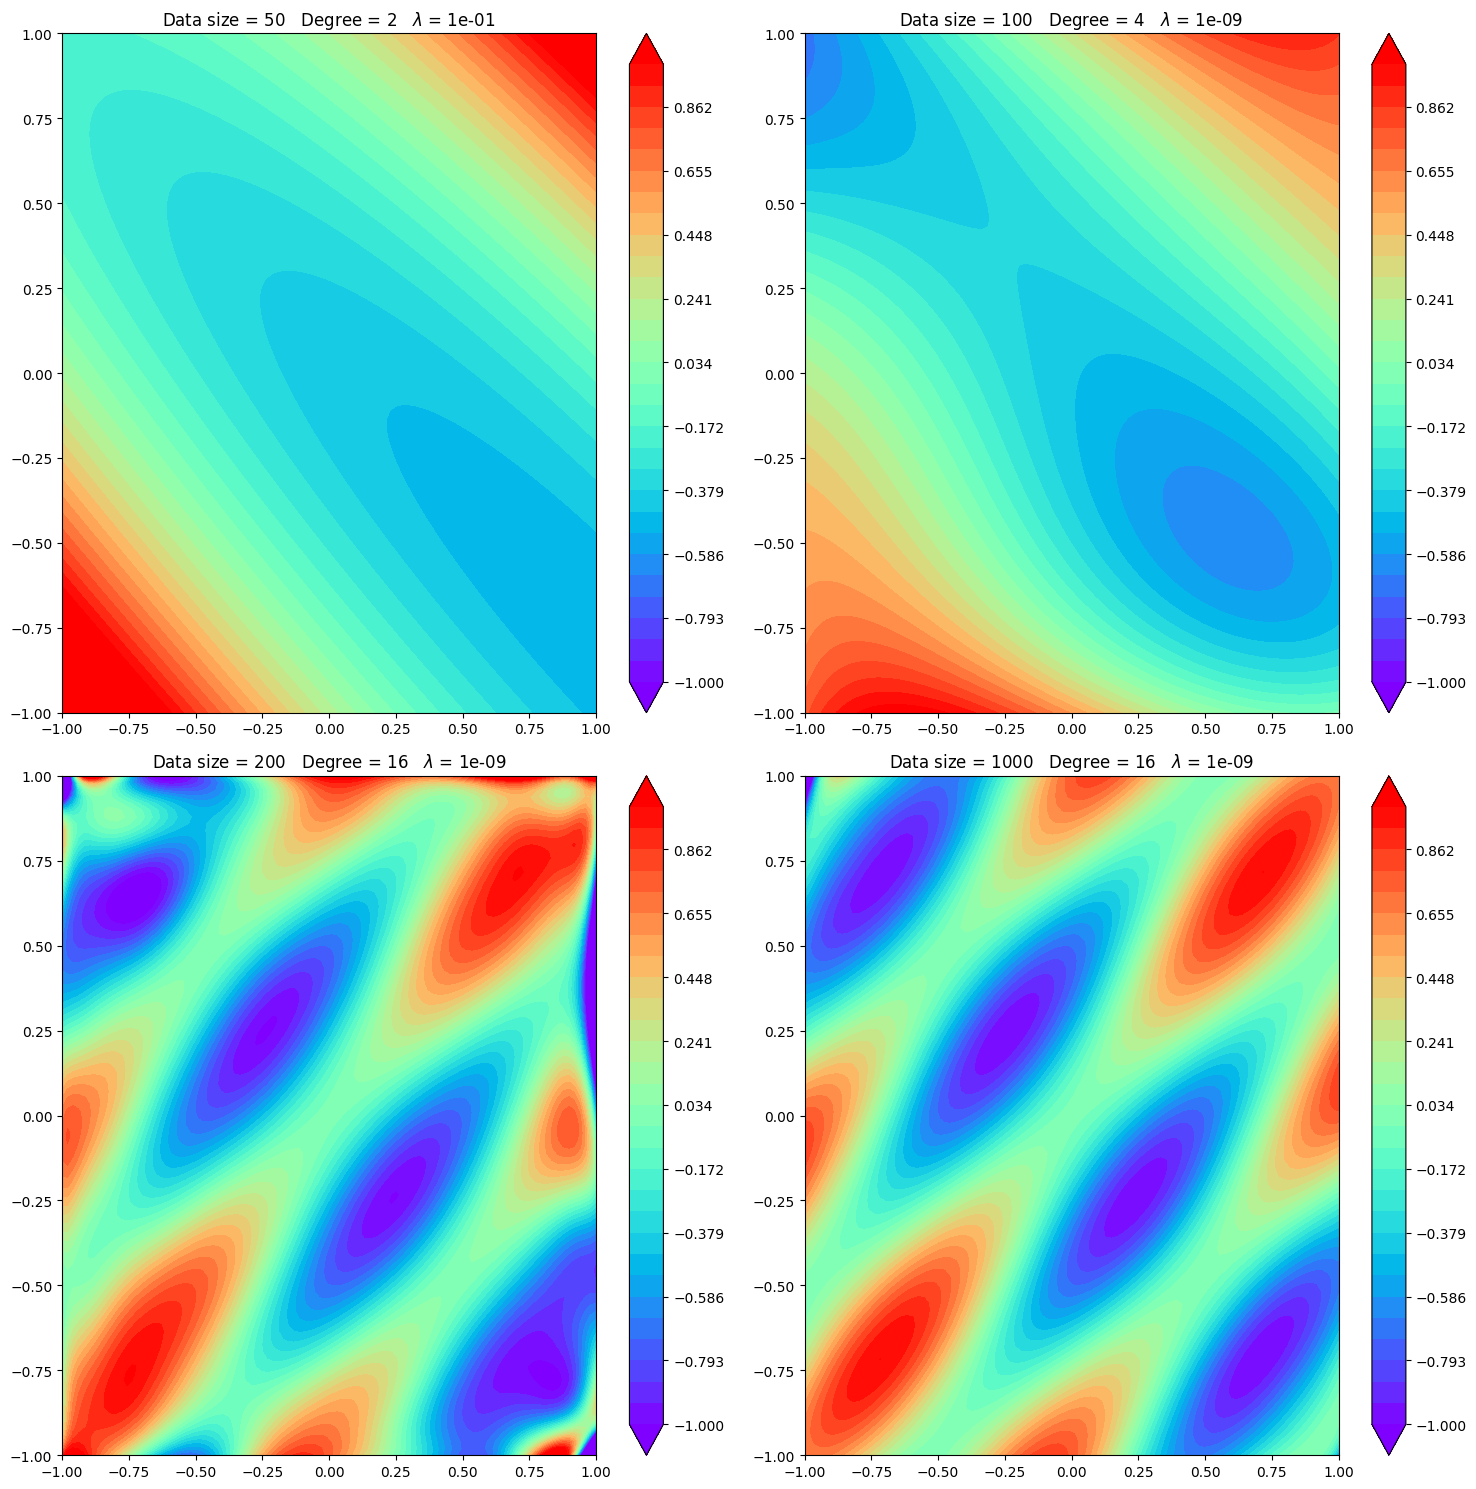

In [ ]:
# Cell type : CodeWrite

data=np.load("../../Data/dataset3_1.npz")


#keys = data.keys()

# Print the keys
#print(keys)

X_train=data['arr_0']
Y_train=data['arr_1']
X_test=data['arr_2']
Y_test=data['arr_3']
topvalue = np.zeros((4, 2))
subset = [50, 100, 200, 1000]
degrees = [1, 2, 4, 8, 16]
lamb_da = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

def feature_phi(X,degree):
  phi=np.ones((X.shape[0],1))
  x1=np.zeros((len(X),1+degree))
  x2=np.zeros((len(X),1+degree))
  for i in range (0,1+degree):
    x1[:,i]=X[:,0]**i
    x2[:,i]=X[:,1]**i
  for i in range(0,1+degree):
    for j in range (0,1+degree):
      if i!=0 or j!=0:
        if i+j<=degree:
          phi=np.hstack((phi,(x1[:,j]*x2[:,i]).reshape(-1,1)))
  return phi

def polynomial_regression_prediction(X_test, wt_vector, degree):

    phi =feature_phi(X_test,degree)
    return np.dot(phi, wt_vector)

def polynomial_regression_train(X_train, Y_train, degree, lamb_da):

    phi = feature_phi(X_train,degree)

    identity_matrix = np.eye(phi.shape[1])
    w_vect = np.matmul(np.matmul(np.linalg.inv((lamb_da * identity_matrix + np.matmul(np.transpose(phi), phi))),(phi.T)),Y_train)
    return w_vect

train_sqr = np.zeros((len(subset ), len(degrees), len(lamb_da)))
test_sqr = np.zeros((len(subset ), len(degrees), len(lamb_da)))

for i in range(len(subset)):
  for j in range(len(degrees)):
    for k in range(len(lamb_da)):
      W_pred = polynomial_regression_train(X_train[:subset[i], :], Y_train[:subset[i]], degrees[j],lamb_da[k])
      Y_training_pred = polynomial_regression_prediction(X_train[:subset[i], :], W_pred, degrees[j])
      Y_testing_pred = polynomial_regression_prediction(X_test, W_pred, degrees[j])
      train_sqr[i, j, k] = np.mean((Y_train[:subset[i]]-Y_training_pred)**2)
      test_sqr[i, j, k] = np.mean((Y_test-Y_testing_pred)**2)

for i in range(len(subset)): #finding the best value using np.where
  min_indices = np.unravel_index(np.argmin(test_sqr[i]), test_sqr[i].shape)
  topvalue[i, :] = [min_indices[0], min_indices[1]]


# Generate contour plots for the chosen hyperparameters
plt.figure(figsize=(15, 15))
for i in range(len(subset)):
    subplotIndex = i + 1
    X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    X_test_mesh = np.hstack((X.copy().reshape(-1, 1), Y.copy().reshape(-1, 1)))
    Z = polynomial_regression_prediction(X_test_mesh, polynomial_regression_train(X_train[:subset[i]], Y_train[:subset[i]], degrees[int(topvalue[i, 0])], lamb_da[int(topvalue[i, 1])]), degrees[int(topvalue[i, 0])]).reshape(100, 100)
    plt.subplot(2, 2, subplotIndex)
    plt.contourf(X, Y, Z, levels=np.linspace(-1, 1, 30), cmap='rainbow', extend='both')
    plt.title("Data size = {}   Degree = {}   $\lambda$ = {:.0e}".format(subset[i], degrees[int(topvalue[i, 0])],lamb_da[int(topvalue[i, 1])]))
    plt.colorbar()
plt.tight_layout()
plt.show()




###  <center><font color='Red'> Training Error Table </font>  </center>

<center>

| Training Set | λ       | 1e-09 | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 |
|--------------|---------|-------|-------|-------|-------|-------|-------|
| 50           | 1       | 0.2504| 0.2504| 0.2504| 0.2504| 0.2504| 0.2559|
|              | 2       | 0.1341| 0.1341| 0.1341| 0.1341| 0.1342| 0.1975|
|              | 4       | 0.1020| 0.1020| 0.1020| 0.1020| 0.1041| 0.1806|
|              | 8       | 0.0001| 0.0002| 0.0108| 0.0417| 0.0820| 0.1632|
|              | 16      | 0.0000| 0.0000| 0.0013| 0.0311| 0.0700| 0.1500|

| Training Set | λ       | 1e-09 | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 |
|--------------|---------|-------|-------|-------|-------|-------|-------|
| 100          | 1       | 0.2581| 0.2581| 0.2581| 0.2581| 0.2581| 0.2587|
|              | 2       | 0.1310| 0.1310| 0.1310| 0.1310| 0.1310| 0.1650|
|              | 4       | 0.1130| 0.1130| 0.1130| 0.1130| 0.1137| 0.1524|
|              | 8       | 0.0416| 0.0416| 0.0417| 0.0580| 0.0929| 0.1449|
|              | 16      | 0.0000| 0.0005| 0.0075| 0.0417| 0.0837| 0.1395|

| Training Set | λ       | 1e-09 | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 |
|--------------|---------|-------|-------|-------|-------|-------|-------|
| 200          | 1       | 0.2465| 0.2465| 0.2465| 0.2465| 0.2465| 0.2466|
|              | 2       | 0.1337| 0.1337| 0.1337| 0.1337| 0.1337| 0.1475|
|              | 4       | 0.1133| 0.1133| 0.1133| 0.1133| 0.1136| 0.1444|
|              | 8       | 0.0617| 0.0617| 0.0617| 0.0639| 0.0957| 0.1412|
|              | 16      | 0.0000| 0.0011| 0.0113| 0.0445| 0.0835| 0.1338|

| Training Set | λ       | 1e-09 | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 |
|--------------|---------|-------|-------|-------|-------|-------|-------|
| 1000         | 1       | 0.2407| 0.2407| 0.2407| 0.2407| 0.2407| 0.2407|
|              | 2       | 0.1388| 0.1388| 0.1388| 0.1388| 0.1388| 0.1397|
|              | 4       | 0.1250| 0.1250| 0.1250| 0.1250| 0.1250| 0.1342|
|              | 8       | 0.0767| 0.0767| 0.0767| 0.0768| 0.0948| 0.1284|
|              | 16      | 0.0000| 0.0004| 0.0065| 0.0384| 0.0850| 0.1217|
</center>
                      
   ###  <center><font color='Red'>Test Error table </font>  </center>  
<center>         
                                                                       
| Training Set | λ      | 1e-09 | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 |
|--------------|--------|-------|-------|-------|-------|-------|-------|
| 50           | 1      | 0.3013| 0.3013| 0.3013| 0.3013| 0.3008| 0.2784|
|              | 2      | 0.1579| 0.1579| 0.1579| 0.1579| 0.1567| 0.2082|
|              | 4      | 0.1573| 0.1573| 0.1573| 0.1572| 0.1618| 0.1966|
|              | 8      | 237.69| 172.50| 18.59 | 0.9903| 0.1652| 0.1939|
|              | 16     | 250.52| 232.02| 66.70 | 2.3373| 0.2040| 0.1961|

| Training Set | λ      | 1e-09 | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 |
|--------------|--------|-------|-------|-------|-------|-------|-------|
| 100          | 1      | 0.2731| 0.2731| 0.2731| 0.2731| 0.2731| 0.2686|
|              | 2      | 0.1532| 0.1532| 0.1532| 0.1532| 0.1529| 0.1757|
|              | 4      | 0.1428| 0.1428| 0.1428| 0.1428| 0.1460| 0.1690|
|              | 8      | 0.7129| 0.7113| 0.5808| 0.2036| 0.1626| 0.1712|
|              | 16     | 54.08 | 11.77 | 23.42 | 0.4178| 0.1884| 0.1742|

| Training Set | λ      | 1e-09 | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 |
|--------------|--------|-------|-------|-------|-------|-------|-------|
| 200          | 1      | 0.2677| 0.2677| 0.2677| 0.2677| 0.2676| 0.2662|
|              | 2      | 0.1458| 0.1458| 0.1458| 0.1458| 0.1458| 0.1587|
|              | 4      | 0.1312| 0.1312| 0.1312| 0.1312| 0.1308| 0.1571|
|              | 8      | 0.1374| 0.1374| 0.1370| 0.1182| 0.1140| 0.1565|
|              | 16     | 0.0371| 0.0837| 0.1708| 0.0869| 0.1112| 0.1522|

| Training Set | λ      | 1e-09 | 1e-07 | 1e-05 | 1e-03 | 1e-01 | 1e+01 |
|--------------|--------|-------|-------|-------|-------|-------|-------|
| 1000         | 1      | 0.2625| 0.2625| 0.2625| 0.2625| 0.2625| 0.2625|
|              | 2      | 0.1424| 0.1424| 0.1424| 0.1424| 0.1424| 0.1445|
|              | 4      | 0.1271| 0.1271| 0.1271| 0.1271| 0.1272| 0.1409|
|              | 8      | 0.0848| 0.0848| 0.0848| 0.0839| 0.0978| 0.1350|
|              | 16     | 0.0012| 0.0015| 0.0110| 0.0497| 0.0907| 0.1278|

</center>

<b>Observation : </b>

As we seen from above that the case with high degree and small regularised parameter gives best results, through for small sample set is not sufficient to conclude, we can say based on large sample sets.


**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











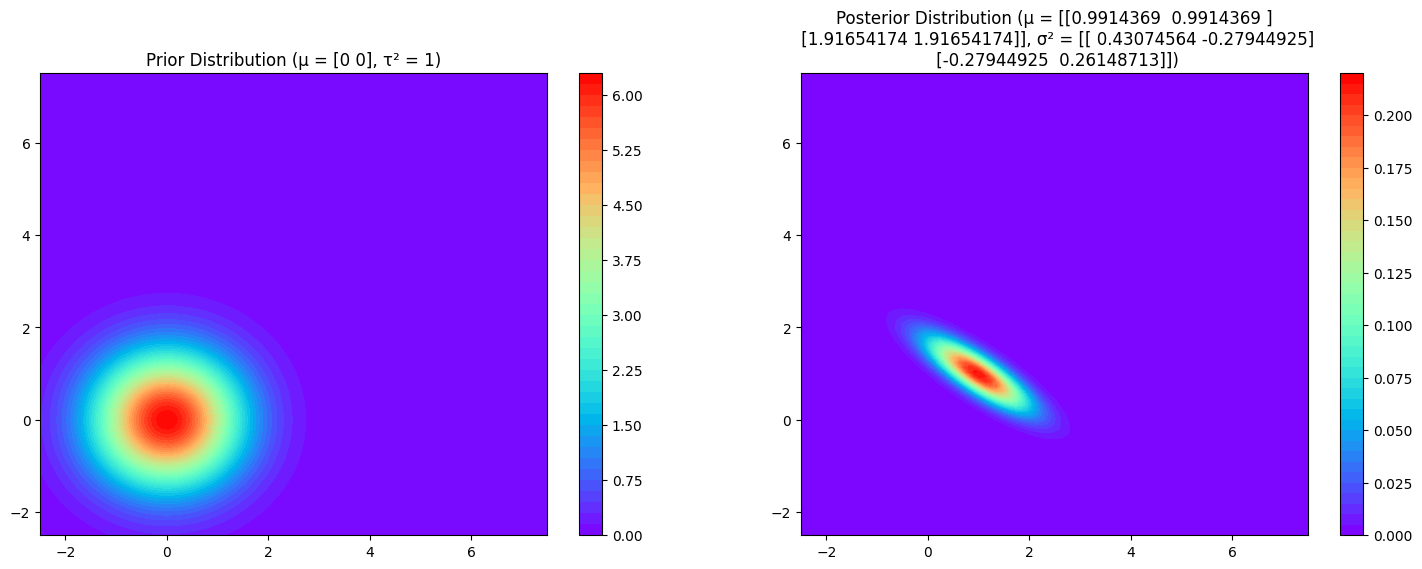

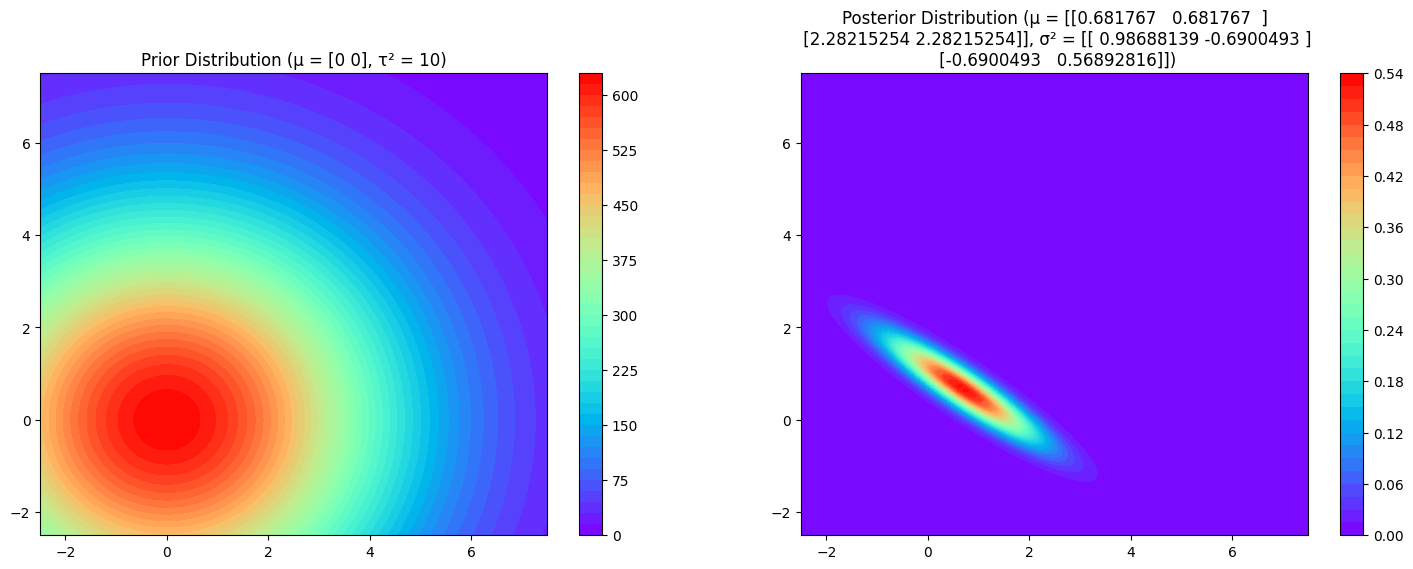

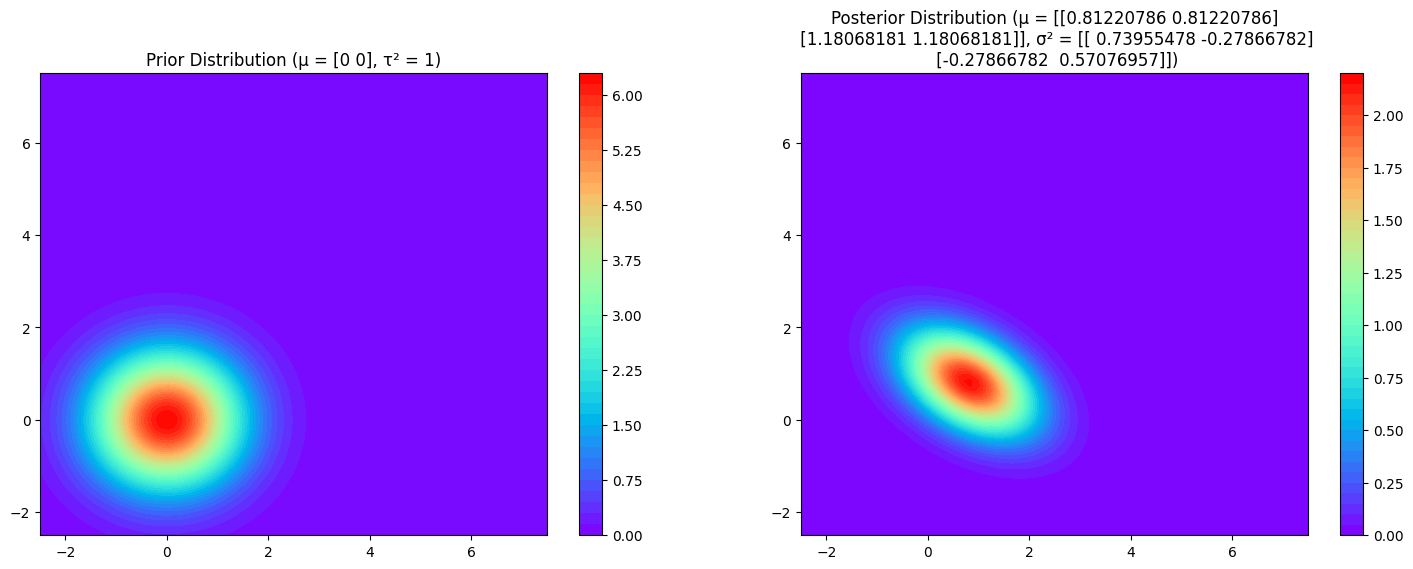

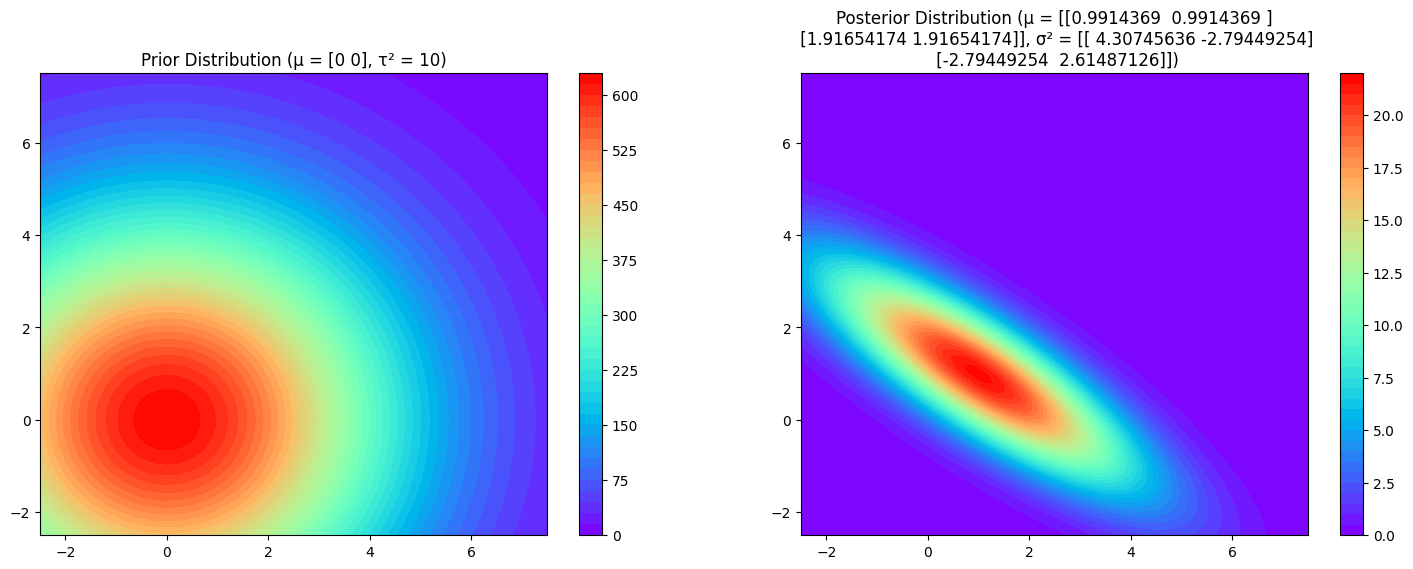

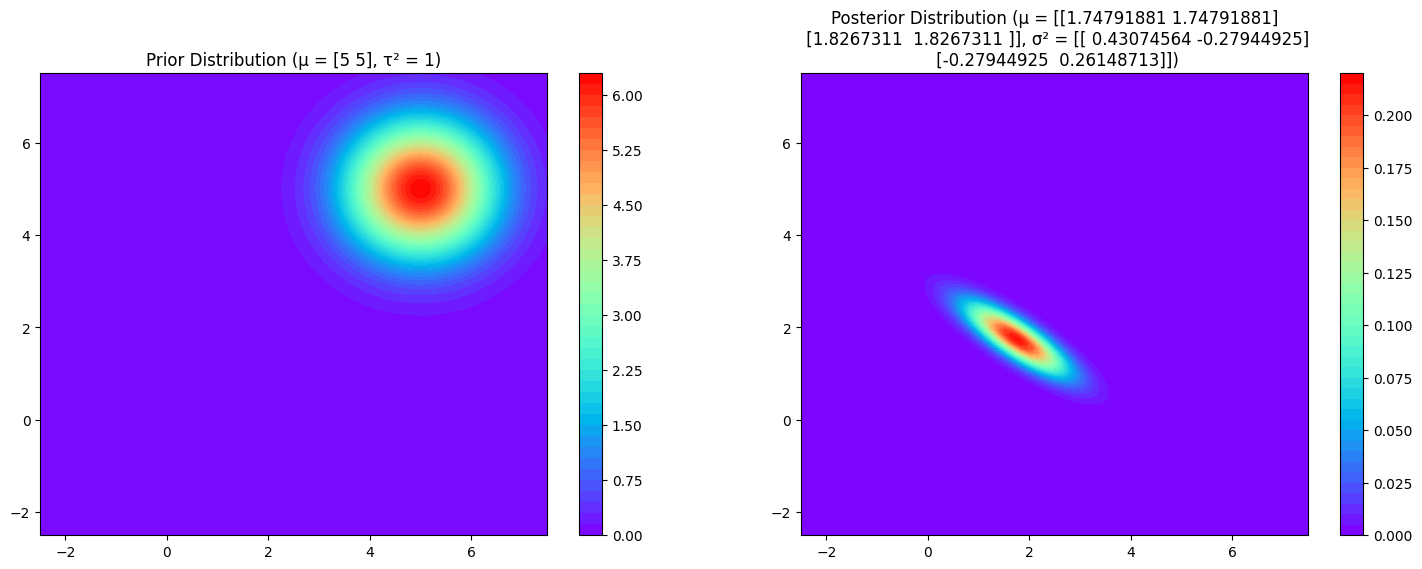

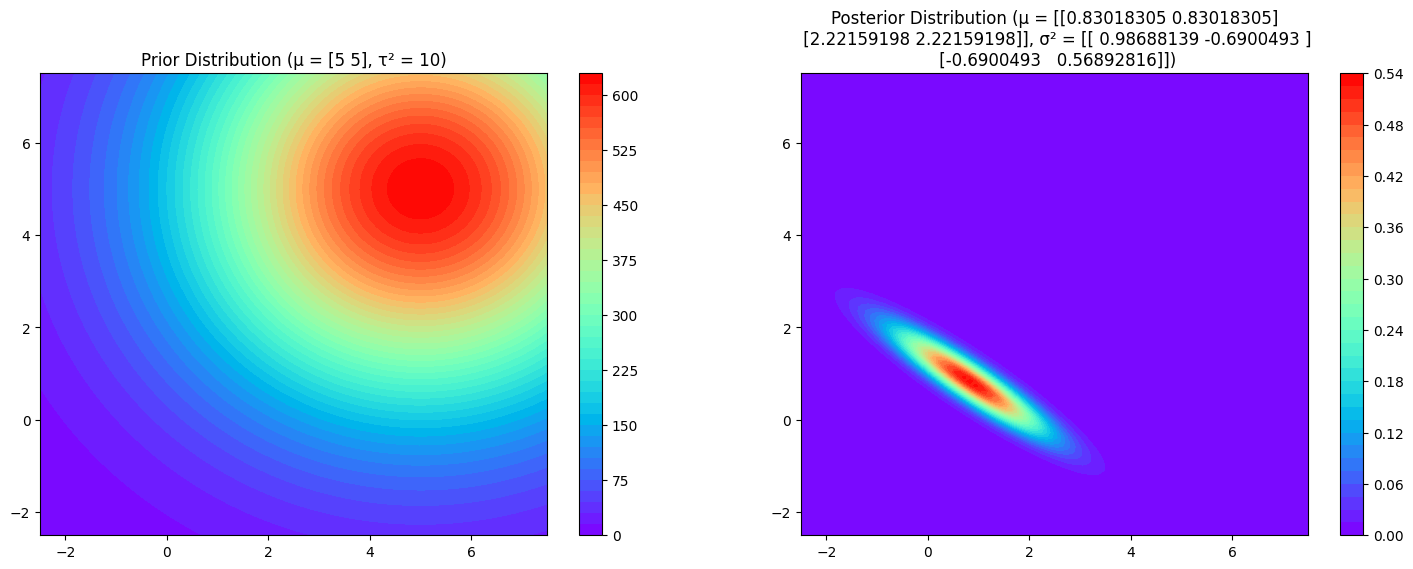

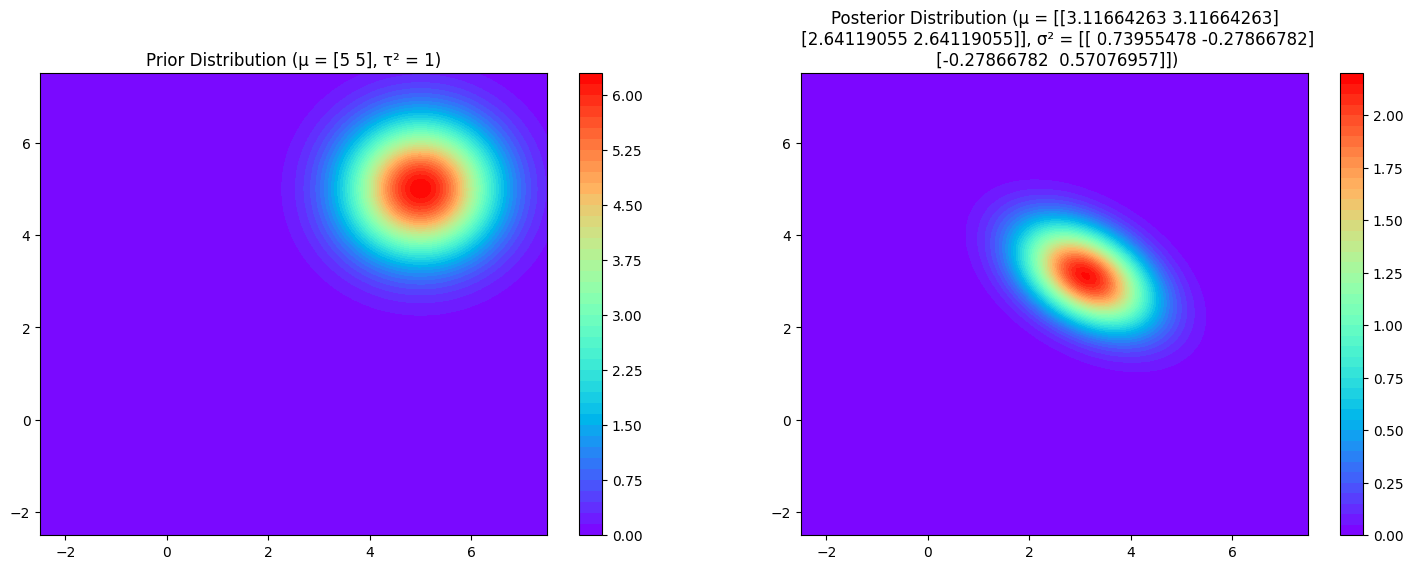

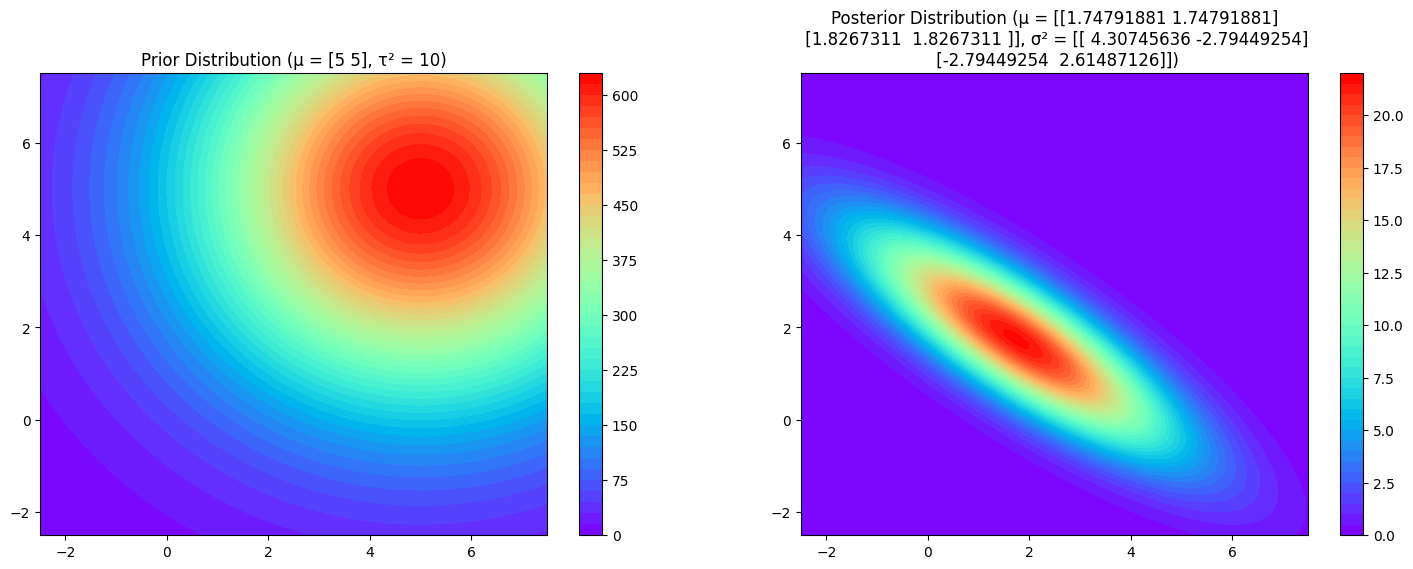

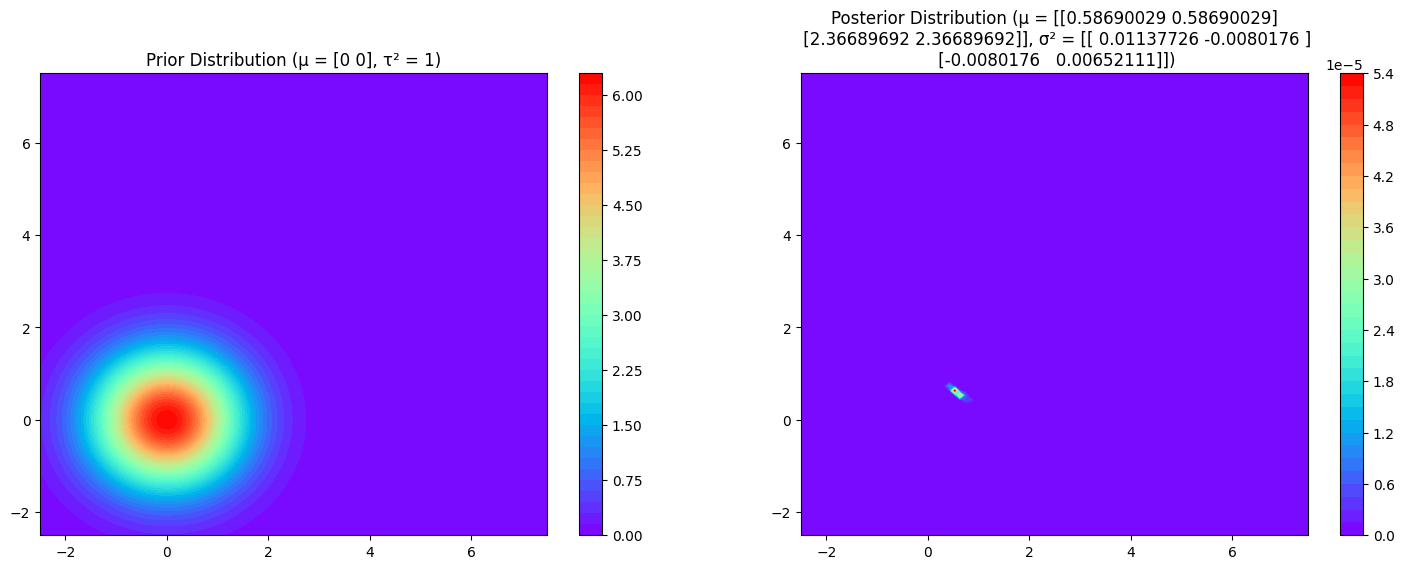

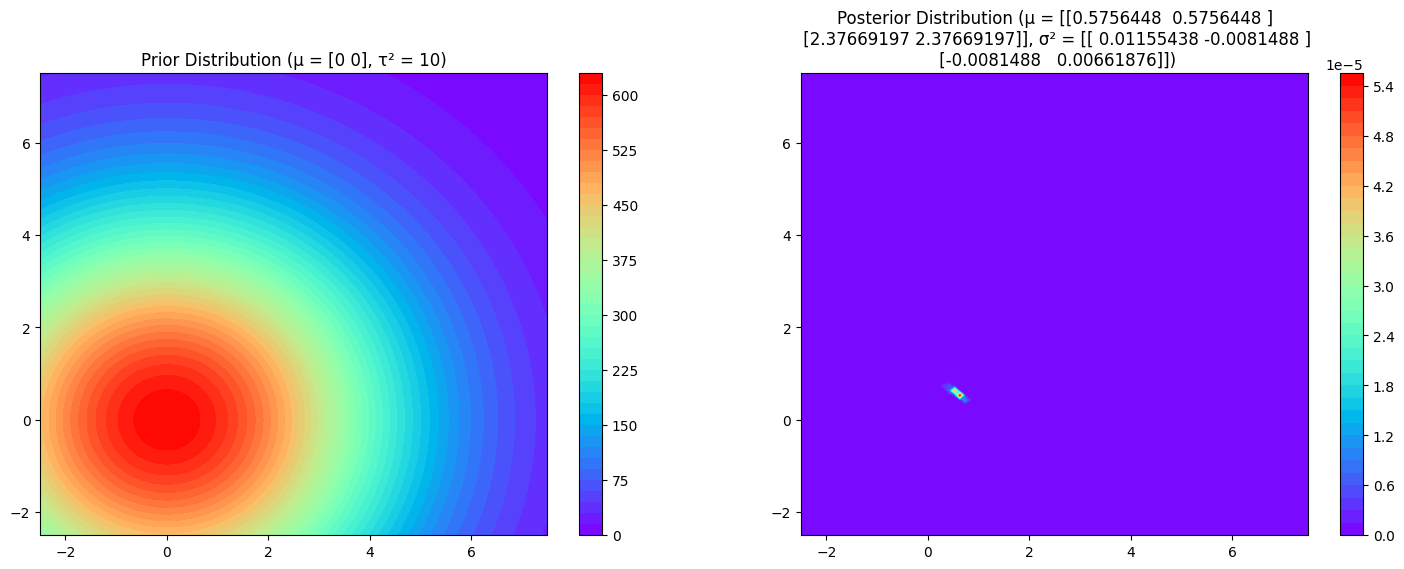

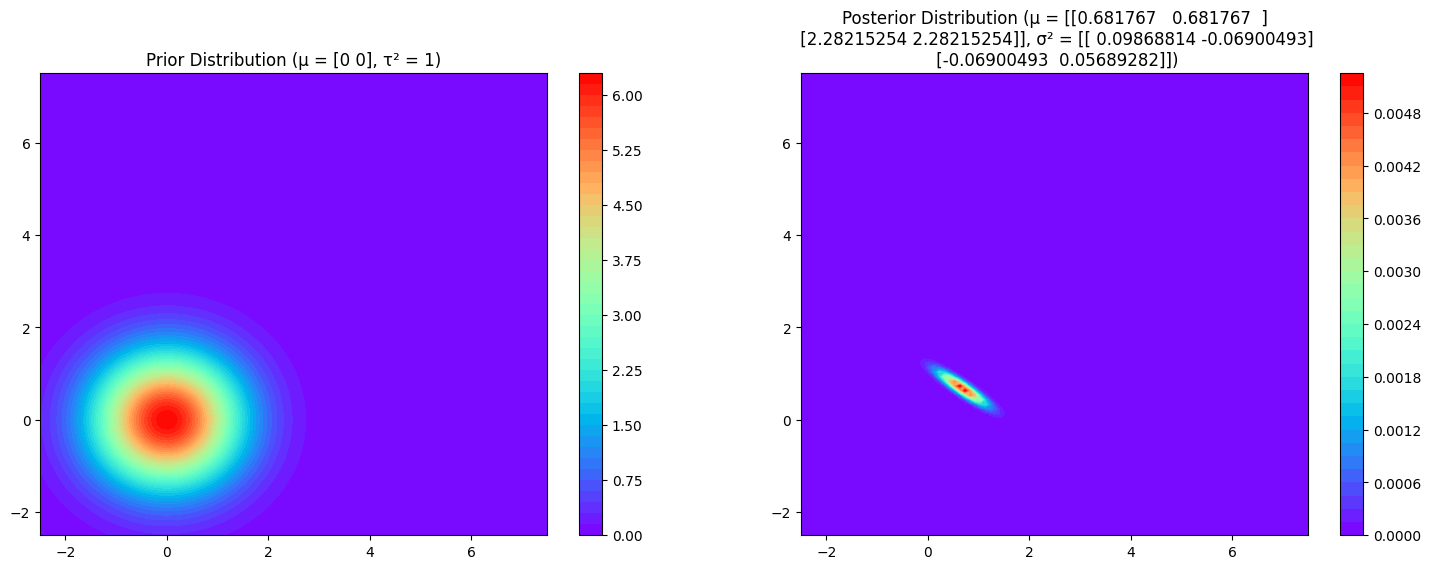

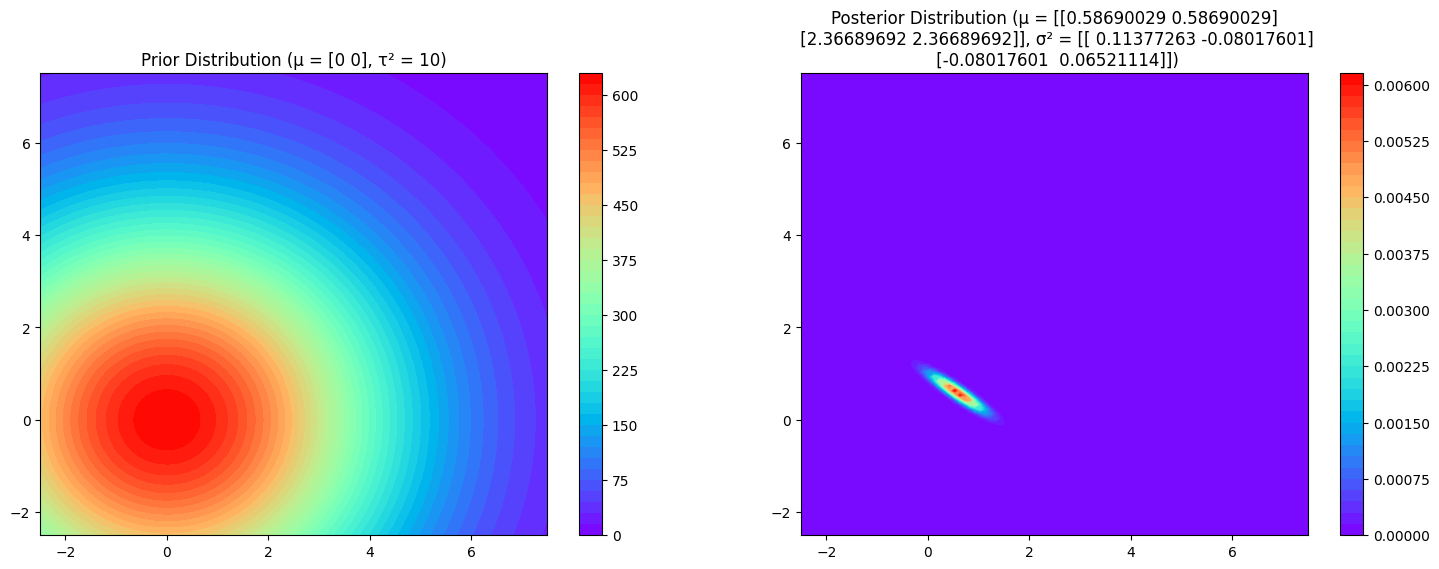

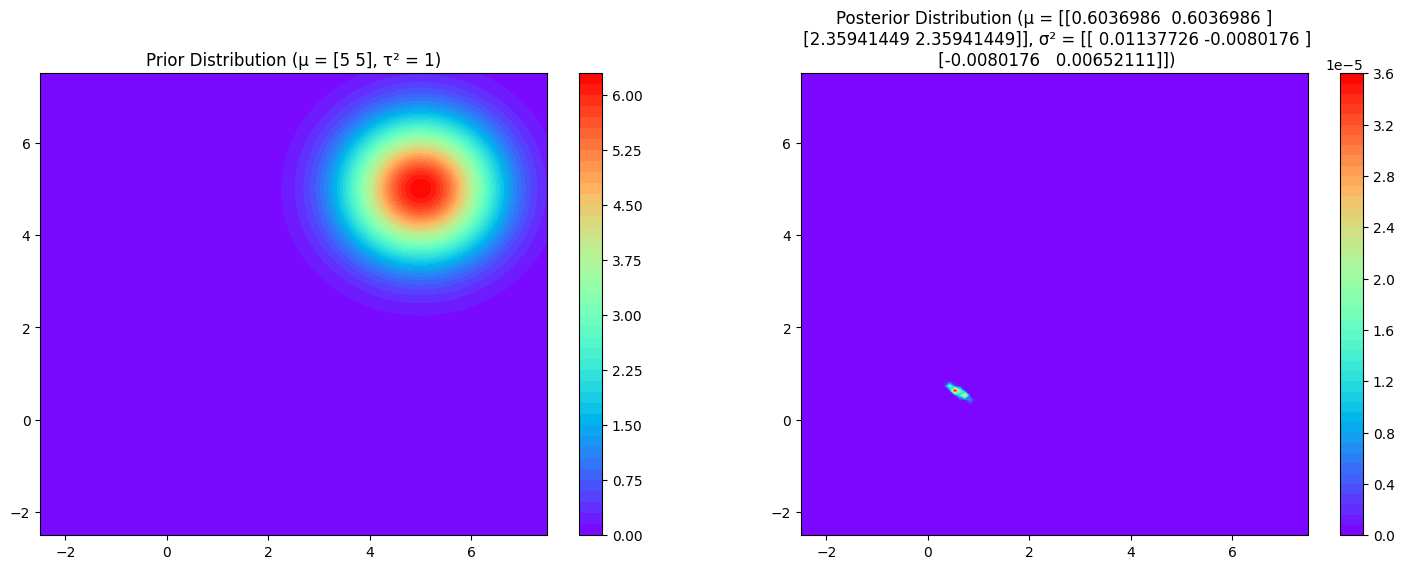

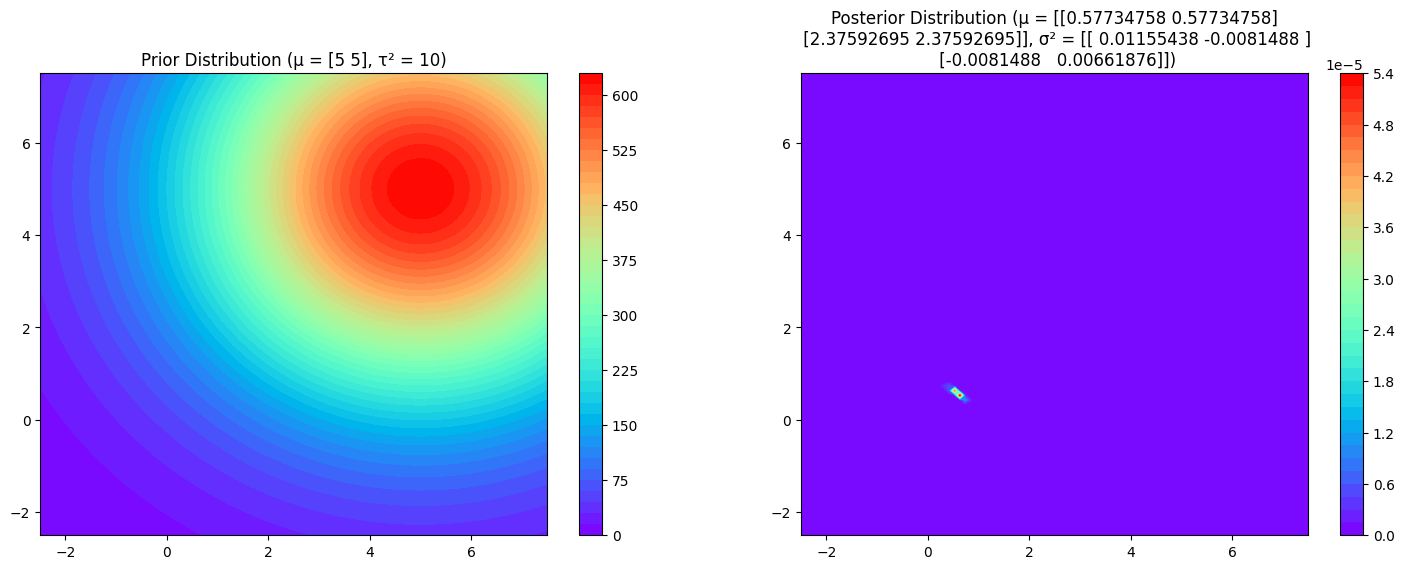

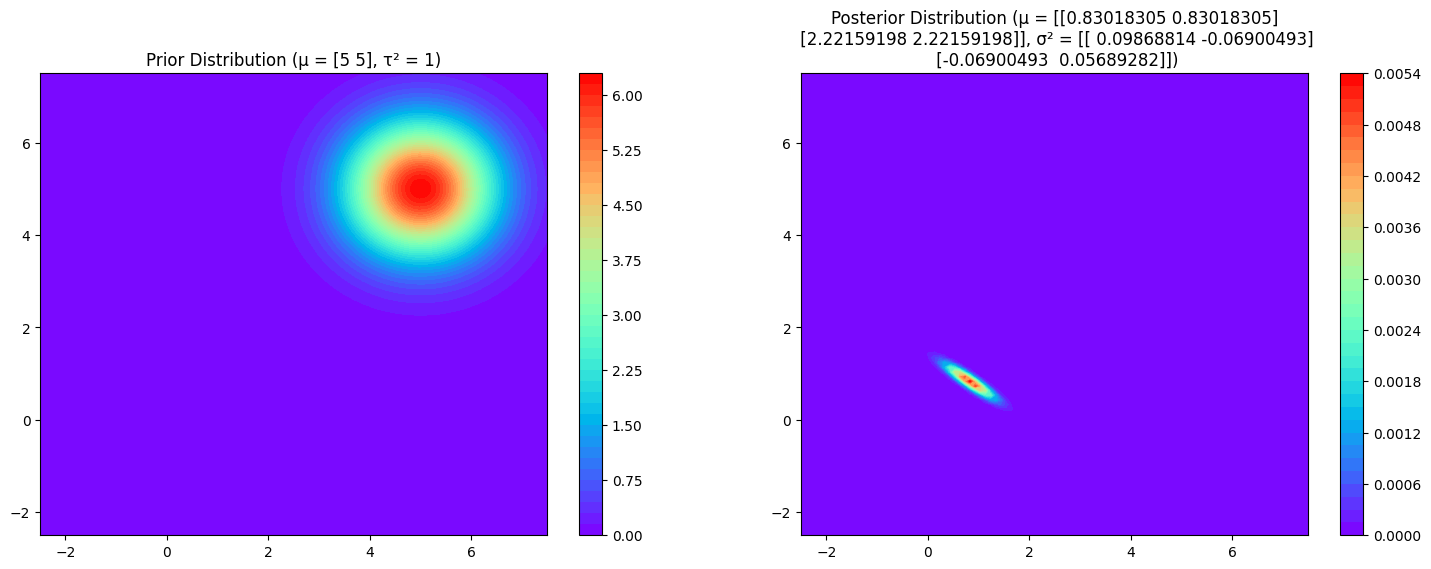

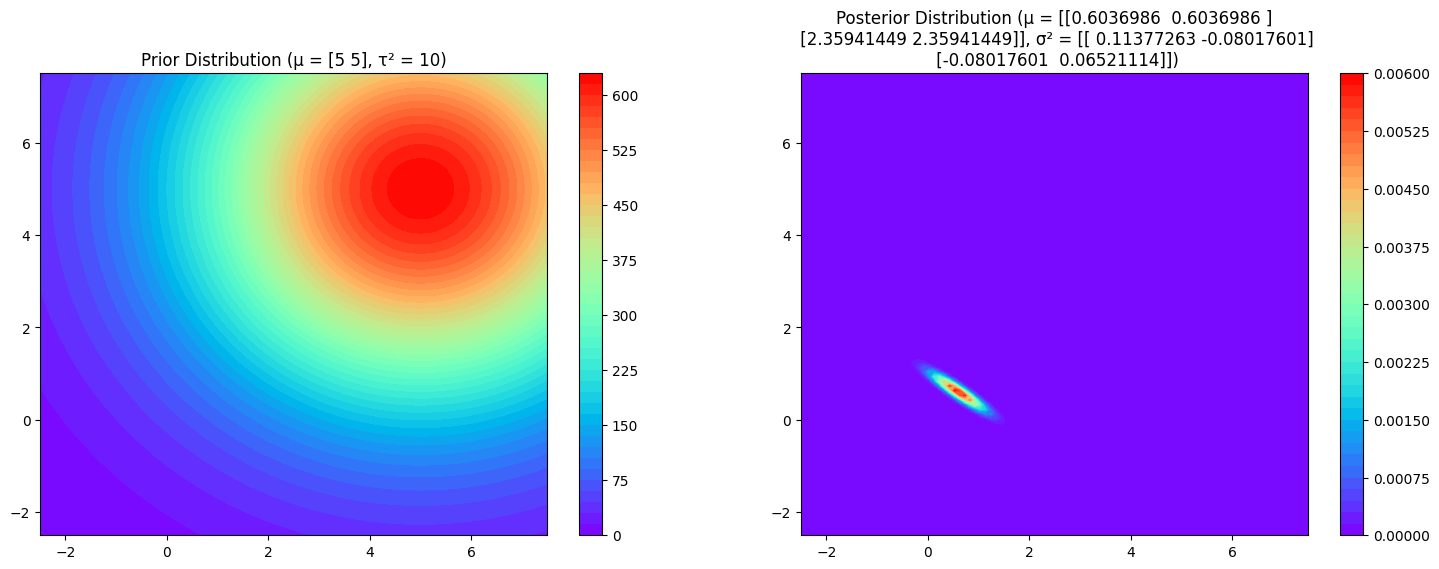

In [ ]:
# Cell type : CodeWrite
# Cell type : CodeWrite

tau_square=[1,10]
sigma_square=[1,10]
X_train=np.array([[1.0,2.0],[2.0,2.1],[0.6,1.5],[1.1,0.9]])
Y_train=np.array([[5.1],[6.1],[4.2],[2.9]])

prior = np.array([[0, 0], [5, 5]])

# Generate a grid of W values
W1_values = np.linspace(-2.5,7.5,100)
W2_values = np.linspace(-2.5,7.5,100)
W1_grid, W2_grid = np.meshgrid(W1_values, W2_values)
W_grid = np.column_stack([W1_grid.ravel(), W2_grid.ravel()])

def multivariate_normal_pdf(x, mean, covariance):
    k = len(mean)
    coefficient = 1 / np.power((1/(2*np.pi)),k/2) * np.linalg.det(covariance)
    exponent = -0.5 * np.matmul(np.transpose(x - mean),np.matmul(np.linalg.inv(covariance), (x - mean)))
    return coefficient * np.exp(exponent)

def bayesian_regression(X,Y,tau_square,sigma_square):
  # from bishop weight_vector W=beta*Sn*T.x*y
  for prior_mean in prior:
    for i,sigma in enumerate(sigma_square):
      for j,tau in enumerate(tau_square):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
                #prior distribution
        prior_covariance = tau * np.eye(2)
        prior_density = np.zeros_like(W1_grid)
        for i in range(W1_grid.shape[0]):
            for j in range(W1_grid.shape[1]):
                w = np.array([W1_grid[i, j], W2_grid[i, j]])
                prior_density[i, j] = multivariate_normal_pdf(w, prior_mean, prior_covariance)
        pm1 = ax1.contourf(W1_grid, W2_grid, prior_density, 50, cmap='rainbow')
        fig.colorbar(pm1, ax=ax1)
        ax1.set_title(f'Prior Distribution (μ = {prior_mean}, τ² = {tau})')


        posterior_covariance=  np.linalg.inv(1/sigma*(np.matmul(np.transpose(X),X))+ ((1/tau)* np.eye(X.shape[1])))
        posterior_mean =  np.matmul(posterior_covariance,( (1/sigma)*np.matmul(np.transpose(X),Y) + np.matmul( ((1/tau)* np.eye(X.shape[1])) , prior_mean)))

#         print(posterior_mean.shape)
#         print(posterior_covariance)

        posterior_density = np.zeros_like(W1_grid)
        for i in range(W1_grid.shape[0]):
            for j in range(W1_grid.shape[1]):
                w = np.array([W1_grid[i, j], W2_grid[i, j]])
                posterior_density[i, j] = multivariate_normal_pdf(w, posterior_mean[0], posterior_covariance)
        pm1 = ax2.contourf(W1_grid, W2_grid, posterior_density, 50, cmap='rainbow')
        fig.colorbar(pm1, ax=ax2)
        ax2.set_title(f'Posterior Distribution (μ = {posterior_mean}, σ² = { posterior_covariance})')
        plt.show()

bayesian_regression(X_train, Y_train, tau_square, sigma_square)

X_train_400 = np.tile(X_train, (100, 1))
Y_train_400 = np.tile(Y_train, (100, 1))

# Define the values of tau and sigma
tau_square = [1, 10]
sigma_square = [1, 10]

# Perform Bayesian regression with 400 data points
bayesian_regression(X_train_400, Y_train_400, tau_square, sigma_square)




<b> Observation </b>

Check the formula bayesian Posterior from bishop

Covariance ($ \Sigma $):
$$
\left( \sigma^2\mathbf{X}^T \mathbf{X} + \tau^{-2}\mathbf{I} \right)^{-1}
$$

Mean($\mu$):

$$
\Sigma \left( \sigma^{-2}\mathbf{X}^T \mathbf{Y} + \tau^{-2}\mu \right)
$$

<br>

i) With a small dataset (4 samples), the high level of trust in prior data is evident in the close resemblance between the mean and variance of the prior and posterior distributions. This is further reflected in the contours, which exhibit a notable similarity.

ii) Conversely, with a larger dataset (400 samples), the estimated values of the mean and variance of the posterior distribution deviate significantly from those of the prior data. This indicates a reduced reliance on the prior information and a heavier dependence on the acquired data, a distinction clearly depicted in the contours, which differ markedly from the previous scenario.

iii) Increasing the value of tau diminishes trust in the prior information, resulting in a more pronounced difference in mean and variance as tau rises.

iv) Similarly, elevating the value of sigma signifies a lesser reliance on the generated data, leading to a smaller disparity in mean and variance as sigma increases. This adjustment weights the prior information more heavily in such instances.



**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [4]:
def linear_kernel(u, v):
    return np.matmul(u, v.T)

def poly_kernel(u, v, degree):
    return (1 + np.matmul(u, v.T))**degree

def rbf_kernel(u, v, gamma):
    return np.exp(-gamma * np.linalg.norm(u - v)**2)

def sigmoid(u):
  z=np.clip(u,-100,100)
  return 1 / (1 + np.exp(-z))

def compute_kernel_matrix(X, kernel, param=None):
    n = X.shape[0]
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if kernel == 'linear':
                K[i, j] = linear_kernel(X[i], X[j])
            elif kernel == 'poly':
                K[i, j] = poly_kernel(X[i], X[j], param)
            elif kernel == 'rbf':
                K[i, j] = rbf_kernel(X[i], X[j], param)
    return K

def train_pred_logistic_regression(X_train, Y_train,  kernel, reg_param, kernel_param=None, num_iter_gd=100, lr=0.01):
    K_train = compute_kernel_matrix(X_train, kernel, kernel_param)
    n = X_train.shape[0]
    alpha = np.zeros(X_train.shape[0])
    for _ in range(num_iter_gd):
        temp = np.zeros(n)
        for i in range(n):
            s = -1 * np.dot(alpha.T, K_train[:, i]) * Y_train[i]
            temp += (-Y_train[i] * K_train[:, i]) * sigmoid(s)
        gradient = reg_param * np.dot(K_train, alpha) + temp
        max_grad_value = 1e6  # Adjust this value as needed
        gradient = np.clip(gradient, -max_grad_value, max_grad_value)
        alpha -= lr * gradient

    return alpha

def compute_kernel_matrix_test(X_train, X_test, kernel, kernel_param=None):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    K = np.zeros((n_train, n_test))
    for i in range(n_train):
        for j in range(n_test):
            if kernel == 'linear':
                K[i, j] = linear_kernel(X_train[i], X_test[j])
            elif kernel == 'poly':
                K[i, j] = poly_kernel(X_train[i], X_test[j], kernel_param)
            elif kernel == 'rbf':
                K[i, j] = rbf_kernel(X_train[i], X_test[j], kernel_param)
    return K
def test_prediction(alpha, X_train, Y_train, X_test, kernel, kernel_param=None):
    K_test = compute_kernel_matrix_test(X_train, X_test, kernel, kernel_param)
    Y_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        val = np.dot(alpha.T, K_test[:, i])
        prob = sigmoid(val)
        if prob >= 0.5:
            Y_pred[i] = 1
        else:
            Y_pred[i] = -1

    return Y_pred

def zero_one_error(preds, y_test):
    return np.sum(preds != y_test) / len(y_test)

In [ ]:

# CodeWrite : Use the functions above to do validation to get best hyperparameters
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.


# Function to load and split data
def load_and_split_data(filename):
    data = np.load(filename)
    train_x, train_y, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    #print(X_train.shape)
    train_size = int(0.70 * train_x.shape[0])

    X_train = train_x[:train_size]
    Y_train = train_y[:train_size]
    X_valid = train_x[train_size:]
    Y_valid = train_y[train_size:]
    return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

# Load and split data for each dataset
X_train_A, Y_train_A, X_val_A, Y_val_A, X_test_A, Y_test_A = load_and_split_data("../../Data/dataset_A.npz")
X_train_B, Y_train_B, X_val_B, Y_val_B, X_test_B, Y_test_B = load_and_split_data("../../Data/dataset_B.npz")
X_train_C, Y_train_C, X_val_C, Y_val_C, X_test_C, Y_test_C = load_and_split_data("../../Data/dataset_C.npz")
X_train_D, Y_train_D, X_val_D, Y_val_D, X_test_D, Y_test_D = load_and_split_data("../../Data/dataset_D.npz")

def valid(X_train, Y_train, X_test, Y_test, X_val, Y_val, kernel):

    lamb_da = [1e-3, 1e-2, 1e-1, 0, 1, 1e2]
    best_lambda = 0
    best_alpha = np.zeros(len(X_train))
    #print(kernel)
    if kernel == 'linear':
        error = 1
        best_degree=1
        for i, value in enumerate(lamb_da):
            alpha = train_pred_logistic_regression(X_train, Y_train,  reg_param=value, kernel=kernel,kernel_param=1,
                                                 num_iter_gd=100)
            Y_predict = test_prediction(alpha, X_train, Y_train, X_val, kernel=kernel, kernel_param=1.0)
            valid_error = zero_one_error(Y_predict, Y_val)
            if valid_error < error:
                error = valid_error
                best_alpha = alpha
                best_lambda = value
        test_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=1.0), Y_test)
        train_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_train, kernel=kernel, kernel_param=1.0), Y_train)
        return test_error, best_alpha, best_lambda,best_degree,train_error

    elif kernel == 'poly':
        error = 1
        degree = [2, 3, 4, 5]
        best_degree = None
        for i, d in enumerate(degree):
            for i, value in enumerate(lamb_da):
                alpha = train_pred_logistic_regression(X_train, Y_train, reg_param=value, kernel=kernel,kernel_param=d,
                                                       num_iter_gd=100)
                Y_predict = test_prediction(alpha, X_train, Y_train, X_val, kernel=kernel, kernel_param=d)
                valid_error = zero_one_error(Y_predict, Y_val)
                if valid_error < error:
                    error = valid_error
                    best_alpha = alpha
                    best_lambda = value
                    best_degree = d
        test_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=best_degree), Y_test)
        train_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_train, kernel=kernel, kernel_param=best_degree), Y_train)
        return test_error, best_alpha, best_lambda, best_degree,train_error

    else:
        error = 1
        degree = [1e-3,1e-2, 1e-1,0, 1, 1e1, 1e2]
        best_degree = None
        for i, d in enumerate(degree):
            for i, value in enumerate(lamb_da):
                alpha = train_pred_logistic_regression(X_train, Y_train,  reg_param=value, kernel=kernel, kernel_param=d,
                                                       num_iter_gd=100)
                Y_predict = test_prediction(alpha, X_train, Y_train, X_val, kernel=kernel, kernel_param=d)
                valid_error = zero_one_error(Y_predict, Y_val)
                if valid_error < error:
                    error = valid_error
                    best_alpha = alpha
                    best_lambda = value
                    best_degree = d
        test_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_test, kernel=kernel, kernel_param=best_degree), Y_test)
        train_error = zero_one_error(test_prediction(best_alpha, X_train, Y_train, X_train, kernel=kernel, kernel_param=best_degree), Y_train)
        return test_error, best_alpha, best_lambda, best_degree,train_error



kernel=["linear","poly","rbf"]
# for d in kernel:
#     test_error_A, best_alpha_A, best_lambda_A, best_degree_A, train_error_A = valid(X_train_A, Y_train_A, X_test_A, Y_test_A, X_val_A, Y_val_A, d)
#     print("Dataset A:")
#     print(d)
#     print("Test error:", test_error_A)
#     print("Train error:", train_error_A)
#     print("Best lambda:", best_lambda_A)
#     print("Best degree:", best_degree_A)
#     print("<----------------->")

# for d in kernel:
#     test_error_B, best_alpha_B, best_lambda_B, best_degree_B, train_error_B = valid(X_train_B, Y_train_B, X_test_B, Y_test_B, X_val_B, Y_val_B, d)
#     print("Dataset B:")
#     print(d)
#     print("Test error:", test_error_B)
#     print("Train error:", train_error_B)
#     print("Best lambda:", best_lambda_B)
#     print("Best degree:", best_degree_B)
#     print("<----------------->")

# for d in kernel:
#     test_error_C, best_alpha_C, best_lambda_C, best_degree_C, train_error_C = valid(X_train_C, Y_train_C, X_test_C, Y_test_C, X_val_C, Y_val_C, d)
#     print("Dataset C:")
#     print(d)
#     print("Test error:", test_error_C)
#     print("Train error:", train_error_C)
#     print("Best lambda:", best_lambda_C)
#     print("Best degree:", best_degree_C)
#     print("<----------------->")

# for d in kernel:
#     test_error_D, best_alpha_D, best_lambda_D, best_degree_D, train_error_D = valid(X_train_D, Y_train_D, X_test_D, Y_test_D, X_val_D, Y_val_D, d)
#     print("Dataset D:")
#     print(d)
#     print("Test error:", test_error_D)
#     print("Train error:", train_error_D)
#     print("Best lambda:", best_lambda_D)
#     print("Best degree:", best_degree_D)
#     print("<----------------->")

<b>dataset_A</b><br>
-From plots we can abserve the data is not <b>lineraly seperable</b> and hence linear kernel does not perform well and gives ~14% error on test data.<br>

-We see that  poly to give same error rate in train and test  and rbf to perform well but only rbf being exponential kernel gives less train and test error rate.


|   kernel     | reg_param | kernel_param | train error | test error |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0     | 1            | 0.13              | 0.14            |
| poly   | 0     | 2            | 0.156           | 0.16             |
| rbf    | 1     | 10           | 0.009           | 0.01             |              |

<b>dataset_B</b><br>
-As we see all kernels performs almost equally

|   kernel     | reg_param | kernel_param | train error | test error |
|--------|-----------|--------------|-------------------|------------------|
| linear | .001        | 1            | 0.242            | .228             |
| poly   | 0     | 3            | 0.175            | 0.2            |
| rbf    | 0     | 1          | 0.172           | 0.198            |

<b>dataset_C</b><br>
-even if we see that linear and poly give high error as can't visualise the dataset hence it is sure that data has complex variation   

|  kernel      | reg_param | kernel_param | train error | test error |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.001     | 1            | 0.49           | 0.48           |
| poly   | 0.001         | 2            | 0.4            | 0.48           |
| rbf    | 0.001     | 0.01         | 0.0               | 0.03             |

<b>dataset_D</b><br>
-the dataset is well classified by a rbf kernel than other kernels as poly and linear give high error rate.  

|     kernel   | reg_param | kernel_param | train error | test error |
|--------|-----------|--------------|-------------------|------------------|
| linear | 0.001       | 1            | 0.50           | 0.23            |
| poly   | 0.001       | 2            | 0.50           | 0.2            |
| rbf    | 1     | 0.001        | 0.21             | 0.10             |


####  <center><font color='Green'> All error rate are in fraction  </font>  </center>


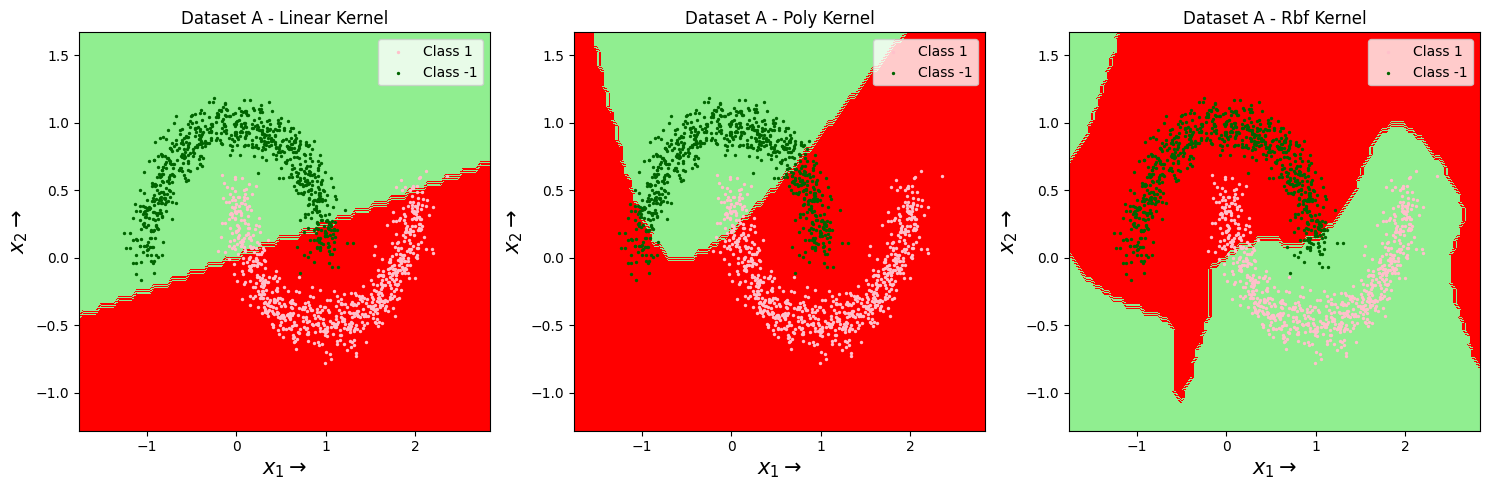

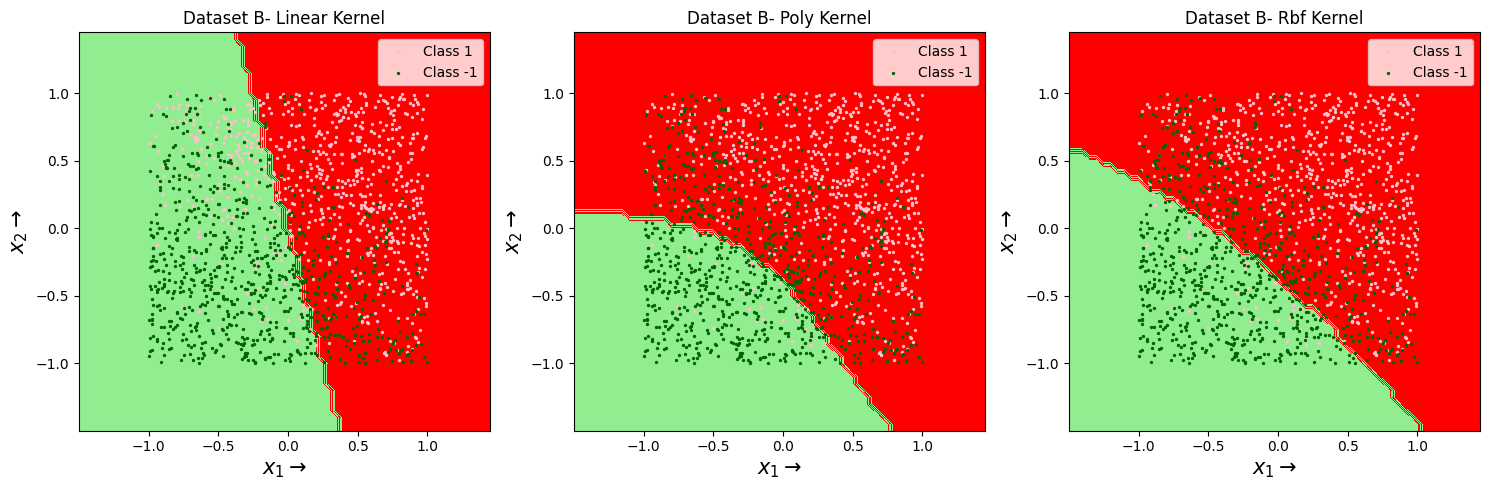

In [5]:
data_A = np.load('Data/dataset_A.npz')
X_train_A, Y_train_A, X_test_A, Y_test_A = data_A['arr_0'], data_A['arr_1'], data_A['arr_2'], data_A['arr_3']
minX_A = min(X_train_A[:, 0]), min(X_train_A[:, 1])
maxX_A = max(X_train_A[:, 0]), max(X_train_A[:, 1])
X_A, Y_A = np.meshgrid(np.arange(minX_A[0]-0.5,maxX_A[0]+0.5, 0.05), np.arange(minX_A[1]-0.5, maxX_A[1]+0.5, 0.05))
samples_A = np.concatenate([X_A.reshape(-1, 1), Y_A.reshape(-1, 1)], axis=1)

# Define parameters for dataset A
reg_A_param = [0, 0, 1]
kernel_A_param=[1, 2, 10]

plt.figure(figsize=(15, 5))
for i, kernel in enumerate(['linear', 'poly', 'rbf']):
    alpha_A = train_pred_logistic_regression(X_train_A, Y_train_A, kernel=kernel, reg_param=reg_A_param[i], kernel_param=kernel_A_param[i], num_iter_gd=100)
    Y_estimate_A = test_prediction(alpha_A, X_train_A, Y_train_A, samples_A, kernel=kernel, kernel_param=kernel_A_param[i])

    plt.subplot(1, 3, i+1)
    plt.contourf(X_A, Y_A, Y_estimate_A.reshape(X_A.shape), colors=['#90EE90','#FF0000'])
    plt.scatter(X_train_A[Y_train_A == 1][:, 0], X_train_A[Y_train_A == 1][:, 1], s=2, c='#FFC0CB', label='Class 1')
    plt.scatter(X_train_A[Y_train_A == -1][:, 0], X_train_A[Y_train_A == -1][:, 1], s=2, c='#006400', label='Class -1')
    plt.title(f'Dataset A - {kernel.capitalize()} Kernel')
    plt.xlabel(r'$x_{1}\rightarrow$', size=15)
    plt.ylabel(r'$x_{2}\rightarrow$', size=15)
    plt.legend()

plt.tight_layout()
plt.show()

data_B = np.load('Data/dataset_B.npz')
X_train_B, Y_train_B, X_test_B, Y_test_B = data_B['arr_0'], data_B['arr_1'], data_B['arr_2'], data_B['arr_3']
minX_B = min(X_train_B[:, 0]), min(X_train_B[:, 1])
maxX_B = max(X_train_B[:, 0]), max(X_train_B[:, 1])
X_B, Y_B = np.meshgrid(np.arange(minX_B[0]-0.5,maxX_B[0]+0.5, 0.05), np.arange(minX_B[1]-0.5, maxX_B[1]+0.5, 0.05))
samples_B = np.concatenate([X_B.reshape(-1, 1), Y_B.reshape(-1, 1)], axis=1)

# Define parameters for dataset B
reg_B_param = [.001, 0, 0]
kernel_B_param=[1, 3, 1]

plt.figure(figsize=(15, 5))
for i, kernel in enumerate(['linear', 'poly', 'rbf']):
    alpha_B= train_pred_logistic_regression(X_train_B, Y_train_B, kernel=kernel, reg_param=reg_B_param[i], kernel_param=kernel_B_param[i], num_iter_gd=100)
    Y_estimate_B = test_prediction(alpha_B, X_train_B, Y_train_B, samples_B, kernel=kernel, kernel_param=kernel_B_param[i])

    plt.subplot(1, 3, i+1)
    plt.contourf(X_B, Y_B, Y_estimate_B.reshape(X_B.shape), colors=['#90EE90','#FF0000'])
    plt.scatter(X_train_B[Y_train_B == 1][:, 0], X_train_B[Y_train_B == 1][:, 1], s=2, c='#FFC0CB', label='Class 1')
    plt.scatter(X_train_B[Y_train_B == -1][:, 0], X_train_B[Y_train_B == -1][:, 1], s=2, c='#006400', label='Class -1')
    plt.title(f'Dataset B- {kernel.capitalize()} Kernel')
    plt.xlabel(r'$x_{1}\rightarrow$', size=15)
    plt.ylabel(r'$x_{2}\rightarrow$', size=15)
    plt.legend()

plt.tight_layout()
plt.show()



**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.feature_index = None
        self.class_label = 0
        self.class_sign = ""
        self.stop_check = True
        self.threshold=None

def entropy(u):
    if u == 0 or u == 1:
        return 0
    else:
        return -1 * (u * np.log(u) + (1 - u) * np.log(1 - u))

def tree_by_entropy(X_train, Y_train, num_nodes_stop):
    root = Node()
    if X_train.shape[0] <= num_nodes_stop:
        root.class_label=np.sign(np.sum(Y_train))
        return root
    else:
        threshold, split_feature_index, entropy_min = 0, 0, float('inf')
        sign=""
        for i in range(X_train.shape[1]):
            for j in range(X_train.shape[0]):
                current_feature = X_train[j, i]
                greater_feature = Y_train[X_train[:, i] > current_feature]
                lesser_feature = Y_train[X_train[:, i] <= current_feature]

                if greater_feature.shape[0] == Y_train.shape[0]:
                    greater_class_feature = 1
                    lesser_class_feature = 0
                elif lesser_feature.shape[0] == Y_train.shape[0]:
                    lesser_class_feature = 1
                    greater_class_feature = 0
                #store fraction of positive point on both side
                else:
                    lesser_class_feature = lesser_feature[lesser_feature == 1].shape[0] / lesser_feature.shape[0]
                    greater_class_feature = greater_feature[greater_feature == 1].shape[0] / greater_feature.shape[0]

                entropy_lesser_class = entropy(lesser_class_feature)
                entropy_greater_classs = entropy(greater_class_feature)
                entropy_avg = (lesser_feature.shape[0] * entropy_lesser_class + greater_feature.shape[0] * entropy_greater_classs)/Y_train.shape[0]

                if entropy_min > entropy_avg:
                    entropy_min = entropy_avg
                    split_feature_index = i
                    threshold = current_feature
        root.feature = split_feature_index
        root.threshold = threshold
        X_left_node = X_train[X_train[:, split_feature_index] <= threshold]
        Y_left_node = Y_train[X_train[:, split_feature_index] <= threshold]
        X_right_node = X_train[X_train[:, split_feature_index] > threshold]
        Y_right_node = Y_train[X_train[:, split_feature_index] > threshold]

        if len(X_right_node) < num_nodes_stop or len(X_left_node) < num_nodes_stop:
            root.class_label = np.sign(np.sum(Y_train))
            return root
        else:
            root.left=tree_by_entropy(X_left_node,Y_left_node,num_nodes_stop)
            root.right=tree_by_entropy(X_right_node,Y_right_node,num_nodes_stop)
            root.stop_check=False
        return root

def tree_by_accuracy(X_train, Y_train, num_nodes_stop):
    root = Node()
    if X_train.shape[0] <= num_nodes_stop:
        root.class_label=np.sign(np.sum(Y_train))
        return root
    else:
        threshold, split_feature_index, accuracy = 0, 0, 0
        sign=""
        for i in range(X_train.shape[1]):
            for j in range(X_train.shape[0]):
                current_feature = X_train[j, i]
                greater_side_feature = Y_train[X_train[:, i] > current_feature]
                lesser_side_feature = Y_train[X_train[:, i] <= current_feature]

                lesser_side_accuracy = (lesser_side_feature[lesser_side_feature == -1].shape[0] + greater_side_feature[greater_side_feature == 1].shape[0]) / Y_train.shape[0]
                greater_side_accuracy = (lesser_side_feature[lesser_side_feature == 1].shape[0] + greater_side_feature[greater_side_feature == -1].shape[0]) / Y_train.shape[0]

                if lesser_side_accuracy > accuracy:
                    threshold = current_feature
                    accuracy = lesser_side_accuracy
                    split_feature_index = i
                    sign="lesser"

                if greater_side_accuracy > accuracy:
                    threshold = current_feature
                    accuracy = greater_side_accuracy
                    split_feature_index=i
                    sign="greater"
        root.feature = split_feature_index
        root.threshold = threshold
        X_left_node = X_train[X_train[:, split_feature_index] <= threshold]
        Y_left_node = Y_train[X_train[:, split_feature_index] <= threshold]
        X_right_node = X_train[X_train[:, split_feature_index] > threshold]
        Y_right_node = Y_train[X_train[:, split_feature_index] > threshold]

        if len(X_right_node) < num_nodes_stop or len(X_left_node) < num_nodes_stop:
            root.class_label = np.sign(np.sum(Y_train))
            return root
        else:
            root.left=tree_by_accuracy(X_left_node,Y_left_node,num_nodes_stop)
            root.right=tree_by_accuracy(X_right_node,Y_right_node,num_nodes_stop)
            root.stop_check=False
            if root.left.stop_check==True:
                if sign=="lesser":
                  root.left.class_label=-1
                else:
                  root.left.class_label=+1
            if root.right.stop_check==True:
                if sign=="lesser":
                  root.right.class_label=+1
                else:
                  root.right.class_label=-1
        return root

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    if criterion == 'accuracy':
        return tree_by_accuracy(X, Y, num_nodes_stop)
    else:
        return tree_by_entropy(X, Y, num_nodes_stop)

def eval_decision_tree(tree, test_X):
    Y_prediction = np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        root = tree
        while (root.stop_check==False):
            if test_X[i, root.feature] <= root.threshold:
                root = root.left
            else:
                root = root.right
        Y_prediction[i] = root.class_label
    return Y_prediction

def zero_one_error(Y_predicted, Y_actual):
    actual_len = len(Y_actual)
    if actual_len == 0:
        return 0  # Return 0 if Y_actual is empty
    else:
        return 1 - len(Y_actual[Y_actual == Y_predicted]) / actual_len

In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.
test_err_accuracy = np.zeros(4)
test_err_entropy = np.zeros(4)
train_err_accuracy = np.zeros(4)
train_err_entropy = np.zeros(4)
nodes_optimal_accuracy=np.zeros(4)
nodes_optimal_entropy=np.zeros(4)

dataset = [np.load('../../Data/dataset_A.npz'),np.load('../../Data/dataset_B.npz')]

def load_and_split_data(filename):
    data = (filename)
    train_x, train_y, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    train_size = int(0.70 * train_x.shape[0])

    X_train = train_x[:train_size]
    Y_train = train_y[:train_size]
    X_valid = train_x[train_size:]
    Y_valid = train_y[train_size:]
    return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

for i,data in enumerate(dataset):
    X_train, Y_train,val_X,val_Y,X_test, Y_test = load_and_split_data(data)
    num_nodes_hyparameter = [50,100,250,300,400,500,600,700,800,900]
    error_accuracy = np.zeros(len(num_nodes_hyparameter))
    error_entropy = np.zeros(len(num_nodes_hyparameter))
    n = np.zeros(len(num_nodes_hyparameter))
    for iter in range(len(num_nodes_hyparameter )):
      tree_acuracy = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyparameter[iter], criterion='accuracy')
      tree_entropy = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyparameter[iter], criterion='entropy')
      pred_Y_accuracy = eval_decision_tree(tree_acuracy, val_X)
      error_accuracy[iter] = zero_one_error(pred_Y_accuracy,val_Y)
      pred_Y_entropy = eval_decision_tree(tree_entropy, val_X)
      error_entropy[iter] = zero_one_error(pred_Y_entropy,val_Y)

    nodes_optimal_accuracy[i] = num_nodes_hyparameter[np.where(error_accuracy == np.amin(error_accuracy))[0][0]]

    train_err_accuracy[i] = np.amin(error_accuracy)
    nodes_optimal_entropy[i] = num_nodes_hyparameter[np.where(error_entropy == np.amin(error_entropy))[0][0]]

    train_err_entropy[i] = np.amin(error_entropy)
    tree_acuracy = train_decision_tree(X_train, Y_train, num_nodes_stop= nodes_optimal_accuracy[i], criterion='accuracy')
    tree_entropy = train_decision_tree(X_train, Y_train, num_nodes_stop= nodes_optimal_entropy[i], criterion='entropy')
    pred_Y_accuracy = eval_decision_tree(tree_acuracy, X_test)
    test_err_accuracy[i] = zero_one_error(pred_Y_accuracy,Y_test)
    pred_Y_entropy = eval_decision_tree(tree_entropy, X_test)
    test_err_entropy[i] = zero_one_error(pred_Y_entropy,Y_test)

data_C = np.load('../../Data/dataset_C.npz')
X_train, Y_train,val_X,val_Y,X_test, Y_test = load_and_split_data(data_C)
num_nodes_hyparameter = [100,150,200,250,300,400,500,600,700,800,900]
error_accuracy = np.zeros(len(num_nodes_hyparameter))
error_entropy = np.zeros(len(num_nodes_hyparameter))
n = np.zeros(len(num_nodes_hyparameter))
for iter in range(len(num_nodes_hyparameter )):
  tree_acuracy = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyparameter[iter], criterion='accuracy')
  tree_entropy = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyparameter[iter], criterion='entropy')
  pred_Y_accuracy = eval_decision_tree(tree_acuracy, val_X)
  error_accuracy[iter] = zero_one_error(pred_Y_accuracy,val_Y)
  pred_Y_entropy = eval_decision_tree(tree_entropy, val_X)
  error_entropy[iter] = zero_one_error(pred_Y_entropy,val_Y)

nodes_optimal_accuracy[2] = num_nodes_hyparameter[np.where(error_accuracy == np.amin(error_accuracy))[0][0]]
train_err_accuracy[2] = np.amin(error_accuracy)
nodes_optimal_entropy[2] = num_nodes_hyparameter[np.where(error_entropy == np.amin(error_entropy))[0][0]]
train_err_entropy[2] = np.amin(error_entropy)
tree_acuracy = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_accuracy[2], criterion='accuracy')
tree_entropy = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_entropy[2], criterion='entropy')
pred_Y_accuracy = eval_decision_tree(tree_acuracy, X_test)
test_err_accuracy[2] = zero_one_error(pred_Y_accuracy,Y_test)
pred_Y_entropy = eval_decision_tree(tree_entropy, X_test)
test_err_entropy[2] =zero_one_error(pred_Y_accuracy,Y_test)

data_D = np.load('../../Data/dataset_D.npz')
X_train, Y_train,val_X ,val_Y, X_test, Y_test = load_and_split_data(data_D)
num_nodes_hyparameter = [30,50,100,200,250,300,400,500,600,700,800,900]
error_accuracy = np.zeros(len(num_nodes_hyparameter))
error_entropy = np.zeros(len(num_nodes_hyparameter))
n = np.zeros(len(num_nodes_hyparameter))
for iter in range(len(num_nodes_hyparameter)):
  tree_acuracy = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyparameter[iter], criterion='accuracy')
  tree_entropy = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyparameter[iter], criterion='entropy')
  pred_Y_accuracy = eval_decision_tree(tree_acuracy, val_X)
  error_accuracy[iter] = zero_one_error(pred_Y_accuracy,val_Y)
  pred_Y_entropy = eval_decision_tree( tree_entropy, val_X)
  error_entropy[iter] = zero_one_error(pred_Y_entropy,val_Y)


nodes_optimal_accuracy[3] = num_nodes_hyparameter[np.where(error_accuracy == np.amin(error_accuracy))[0][0]]
train_err_accuracy[3] = np.amin(error_accuracy)
nodes_optimal_entropy[3] = num_nodes_hyparameter[np.where(error_entropy == np.amin(error_entropy))[0][0]]
train_err_entropy[3] = np.amin(error_entropy)
tree_acuracy = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_accuracy[3] , criterion='accuracy')
tree_entropy = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_entropy[3], criterion='entropy')
pred_Y_accuracy = eval_decision_tree(tree_acuracy, X_test)
test_err_accuracy[3] = zero_one_error(pred_Y_accuracy,Y_test)
pred_Y_entropy = eval_decision_tree(tree_entropy, X_test)
test_err_entropy[3] =zero_one_error(pred_Y_accuracy,Y_test)

# print("Entropy")
# for i in range(len(nodes_optimal_accuracy)):
#     print("Test error: " + str(test_err_entropy[i]) + ", Train error: " + str(train_err_entropy[i]) + ", Optimum node: " + str(nodes_optimal_entropy[i]))
# print("Accuracy")
# for i in range(len(nodes_optimal_accuracy)):
#     print("Test error: " + str(test_err_accuracy[i]) + ", Train error: " + str(train_err_accuracy[i]) + ", Optimum node: " + str(nodes_optimal_accuracy[i]))



Entropy Criterion :

Dataset | Stopping node choice | Train zero-one error | Test zero-one error
--- |--- |--- |---
A |50| .51 | .49
B | 50| .50 | 0.51
C | 100|0.49 |0.22
D | 30| 0.7 | 0.106

Accuracy Criterion :

Dataset | Stopping node choice | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 50 | 0.104 | .126
B |50 | 0.24 | 0.222
C | 100 | 0.21 | 0.22
D | 30 | 0.07 | .106


<b>Observations :</b><br>
1) While it's possible to overfit and precisely fit the decision tree to the training data, this often leads to suboptimal performance when applied to new, unseen data during validation and testing (using num_nodes_stop = 1).

3) As accuracy Criterion give less error as compared to entropy Criterion for Dataset A and B

<Figure size 640x480 with 0 Axes>

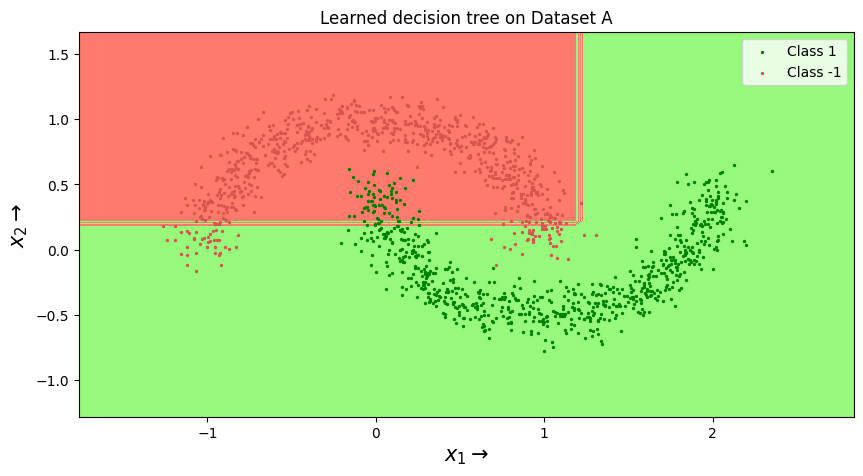

<Figure size 640x480 with 0 Axes>

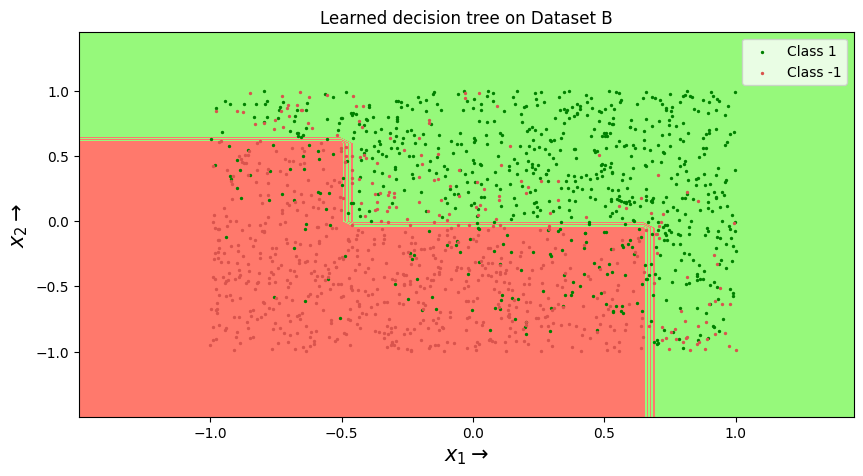

In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

data_A = np.load('../../Data/dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
tree = train_decision_tree(X_train, Y_train, num_nodes_stop=50, criterion='accuracy')
pred_Y = eval_decision_tree(tree, test_samples)

plt.figure(0)
f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(10,5))
ax1.contourf(X,Y,pred_Y.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Learned decision tree on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()
plt.show()

data_B = np.load('../../Data/dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
tree = train_decision_tree(X_train, Y_train, num_nodes_stop=50, criterion='accuracy')
pred_Y = eval_decision_tree(tree, test_samples)

plt.figure(1)
f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(10,5))
ax1.contourf(X,Y,pred_Y.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Learned decision tree on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()
plt.show()

**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier.
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.feature_index = None
        self.class_label = 0
        self.class_sign = ""
        self.stop_check = True
        self.threshold=None

def entropy(u):
    if u == 0 or u == 1:
        return 0
    else:
        return -1 * (u * np.log(u) + (1 - u) * np.log(1 - u))

def tree_by_entropy(X_train, Y_train, num_nodes_stop,b):
    root = Node()
    if X_train.shape[0] <= num_nodes_stop:
        root.class_label=np.sign(np.sum(Y_train))
        return root
    else:
        threshold, split_feature_index, entropy_min = 0, 0, float('inf')
        sign=""
        for i in np.random.choice(range(X_train.shape[1]), int(b*X_train.shape[1]), replace=False):
            for j in range(X_train.shape[0]):
                current_feature = X_train[j, i]
                greater_feature = Y_train[X_train[:, i] > current_feature]
                lesser_feature = Y_train[X_train[:, i] <= current_feature]

                if greater_feature.shape[0] == Y_train.shape[0]:
                    greater_class_feature = 1
                    lesser_class_feature = 0
                elif lesser_feature.shape[0] == Y_train.shape[0]:
                    lesser_class_feature = 1
                    greater_class_feature = 0
                #store fraction of positive point on both side
                else:
                    lesser_class_feature = lesser_feature[lesser_feature == 1].shape[0] / lesser_feature.shape[0]
                    greater_class_feature = greater_feature[greater_feature == 1].shape[0] / greater_feature.shape[0]

                entropy_lesser_class = entropy(lesser_class_feature)
                entropy_greater_classs = entropy(greater_class_feature)
                entropy_avg = (lesser_feature.shape[0] * entropy_lesser_class + greater_feature.shape[0] * entropy_greater_classs)/Y_train.shape[0]

                if entropy_min > entropy_avg:
                    entropy_min = entropy_avg
                    split_feature_index = i
                    threshold = current_feature

        root.feature = split_feature_index
        root.threshold = threshold
        X_left_node = X_train[X_train[:, split_feature_index] <= threshold]
        Y_left_node = Y_train[X_train[:, split_feature_index] <= threshold]
        X_right_node = X_train[X_train[:, split_feature_index] > threshold]
        Y_right_node = Y_train[X_train[:, split_feature_index] > threshold]

        if len(X_right_node) < num_nodes_stop or len(X_left_node) < num_nodes_stop:
            root.class_label = np.sign(np.sum(Y_train))
            return root
        else:
            root.left=tree_by_entropy(X_left_node,Y_left_node,num_nodes_stop,b)
            root.right=tree_by_entropy(X_right_node,Y_right_node,num_nodes_stop,b)
            root.stop_check=False
        return root

def tree_by_accuracy(X_train, Y_train, num_nodes_stop,b):
    root = Node()
    if X_train.shape[0] <= num_nodes_stop:
        root.class_label=np.sign(np.sum(Y_train))
        return root
    else:
        threshold, split_feature_index, accuracy = 0, 0, 0
        sign=""
        for i in np.random.choice(range(X_train.shape[1]), int(b*X_train.shape[1]), replace=False):
            for j in range(X_train.shape[0]):
                current_feature = X_train[j, i]
                greater_side_feature = Y_train[X_train[:, i] > current_feature]
                lesser_side_feature = Y_train[X_train[:, i] <= current_feature]

                lesser_side_accuracy = (lesser_side_feature[lesser_side_feature == -1].shape[0] + greater_side_feature[greater_side_feature == 1].shape[0]) / Y_train.shape[0]
                greater_side_accuracy = (lesser_side_feature[lesser_side_feature == 1].shape[0] + greater_side_feature[greater_side_feature == -1].shape[0]) / Y_train.shape[0]

                if lesser_side_accuracy > accuracy:
                    threshold = current_feature
                    accuracy = lesser_side_accuracy
                    split_feature_index = i
                    sign="lesser"

                if greater_side_accuracy > accuracy:
                    threshold = current_feature
                    accuracy = greater_side_accuracy
                    split_feature_index=i
                    sign="greater"
        root.feature = split_feature_index
        root.threshold = threshold
        X_left_node = X_train[X_train[:, split_feature_index] <= threshold]
        Y_left_node = Y_train[X_train[:, split_feature_index] <= threshold]
        X_right_node = X_train[X_train[:, split_feature_index] > threshold]
        Y_right_node = Y_train[X_train[:, split_feature_index] > threshold]

        if len(X_right_node) < num_nodes_stop or len(X_left_node) < num_nodes_stop:
            root.class_label = np.sign(np.sum(Y_train))
            return root
        else:
            root.left=tree_by_accuracy(X_left_node,Y_left_node,num_nodes_stop,b)
            root.right=tree_by_accuracy(X_right_node,Y_right_node,num_nodes_stop,b)
            root.stop_check=False
            if root.left.stop_check==True:
                if sign=="lesser":
                  root.left.class_label=-1
                else:
                  root.left.class_label=+1
            if root.right.stop_check==True:
                if sign=="lesser":
                  root.right.class_label=+1
                else:
                  root.right.class_label=-1
        return root

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy',b=0.5):
    if criterion == 'accuracy':
        return tree_by_accuracy(X, Y, num_nodes_stop,b)
    else:
        return tree_by_entropy(X, Y, num_nodes_stop,b)

def eval_decision_tree(tree, test_X):
    Y_prediction = np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        root = tree
        while (root.stop_check==False):
            if test_X[i, root.feature] <= root.threshold:
                root = root.left
            else:
                root = root.right
        Y_prediction[i] = root.class_label
    return Y_prediction

def zero_one_error(Y_predicted,Y_actual):
    return 1- len(Y_actual[Y_actual == Y_predicted])/len(Y_actual)


def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1,
                        criterion='accuracy', a=0.5, b=0.5):
    forest=[]
    for no_tree in range(num_trees):
        index = np.random.choice(len(X), size=len(X), replace=True)
        data_learn=int(len(X)*a)
        training_data=index[:data_learn]
        remain_data=index[data_learn:]
        X_train=X[training_data]
        Y_train=Y[training_data]
        tree=train_decision_tree(X_train,Y_train,1,criterion,b)
        forest.append(tree)
    return forest


def eval_random_forest(random_forest, test_X):
    predicted_Y = np.zeros(test_X.shape[0])
    #making prediction by averaging nestimation
    for i in range(len(random_forest)):
        predicted_Y=predicted_Y+eval_decision_tree(random_forest[i],test_X)
    #average value
    predicted_Y = predicted_Y/len(random_forest)
    predicted_Y=np.sign(predicted_Y)
    predicted_Y[predicted_Y==0] = 1
    return predicted_Y


In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

test_err_accuracy = np.zeros(4)
test_err_entropy = np.zeros(4)
train_err_accuracy = np.zeros(4)
train_err_entropy = np.zeros(4)
nums_tree_accuracy=np.zeros(4)
nums_tree_entropy=np.zeros(4)
dataset = [np.load('../../Data/dataset_A.npz'),np.load('../../Data/dataset_B.npz')]
def load_and_split_data(filename):
    data = filename
    train_x, train_y, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    train_size = int(0.70 * train_x.shape[0])

    X_train = train_x[:train_size]
    Y_train = train_y[:train_size]
    X_valid = train_x[train_size:]
    Y_valid = train_y[train_size:]
    return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

for i,data in enumerate(dataset):
    X_train, Y_train,X_val,Y_val, X_test, Y_test = load_and_split_data(data)
    nums_tree =  [1,5,10,15,20]
    error_accuracy = np.zeros(len(nums_tree))
    error_entropy = np.zeros(len(nums_tree))
    n = np.zeros(len(nums_tree))
    for iter in range(len(nums_tree)):
        forest_accuracy = train_random_forest(X_train, Y_train, num_trees=nums_tree[iter], num_nodes_stop=1, criterion="accuracy", a=.5, b=.5)
        forest_entropy = train_random_forest(X_train, Y_train, num_trees=nums_tree[iter], num_nodes_stop=1,criterion="entropy", a=.5, b=.5)
        predicted_accuracy_Y = eval_random_forest(forest_accuracy, X_val)
        predicted_entropy_Y = eval_random_forest(forest_entropy, X_val)
        error_accuracy[iter] = zero_one_error(predicted_accuracy_Y, Y_val)
        error_entropy[iter] = zero_one_error(predicted_entropy_Y,Y_val)

    nums_tree_accuracy[i] = nums_tree[np.where(error_accuracy == np.amin(error_accuracy))[0][0]]
    train_err_accuracy[i] = np.amin(error_accuracy)
    nums_tree_entropy[i] = nums_tree[np.where(error_entropy == np.amin(error_entropy))[0][0]]
    train_err_entropy[i] = np.amin(error_entropy)

    forest_accuracy = train_random_forest(X_train, Y_train, num_trees = int(nums_tree_accuracy[i]),num_nodes_stop= 1, criterion='accuracy')
    forest_entropy = train_random_forest(X_train, Y_train, num_trees = int(nums_tree_entropy[i]),num_nodes_stop = 1, criterion='entropy')
    pred_Y_accuracy = eval_random_forest(forest_accuracy, X_test)
    pred_Y_entropy = eval_random_forest(forest_entropy, X_test)
    test_err_accuracy[i] = zero_one_error(pred_Y_accuracy,Y_test)
    test_err_entropy[i] = zero_one_error(pred_Y_entropy,Y_test)

data_C = np.load('../../Data/dataset_C.npz')
X_train, Y_train,X_val,Y_val, X_test, Y_test = load_and_split_data(data_C)
nums_tree =  [1,5,10,15,20]
error_accuracy = np.zeros(len(nums_tree))
error_entropy = np.zeros(len(nums_tree))
n = np.zeros(len(nums_tree))
for iter in range(len(nums_tree )):
    forest_accuracy = train_random_forest(X_train, Y_train, num_trees=nums_tree[iter], num_nodes_stop=1,
                                 criterion="accuracy", a=.5, b=.5)
    forest_entropy = train_random_forest(X_train, Y_train, num_trees=nums_tree[iter], num_nodes_stop=1,
                                 criterion="entropy", a=.5, b=.5)
    predicted_accuracy_Y = eval_random_forest(forest_accuracy, X_val)
    predicted_entropy_Y = eval_random_forest(forest_entropy, X_val)
    error_accuracy[iter] = zero_one_error(predicted_accuracy_Y, Y_val)
    error_entropy[iter] = zero_one_error(predicted_entropy_Y,Y_val)

nums_tree_accuracy[2] = nums_tree[np.where(error_accuracy == np.amin(error_accuracy))[0][0]]
train_err_accuracy[2] = np.amin(error_accuracy)
nums_tree_entropy[2] = nums_tree[np.where(error_entropy == np.amin(error_entropy))[0][0]]
train_err_entropy[2] = np.amin(error_entropy)
forest_accuracy = train_random_forest(X_train, Y_train, num_trees = int(nums_tree_accuracy[2]),num_nodes_stop= 1, criterion='accuracy')
forest_entropy = train_random_forest(X_train, Y_train, num_trees = int(nums_tree_entropy[2]),num_nodes_stop = 1, criterion='entropy')
pred_Y_accuracy = eval_random_forest(forest_accuracy, X_test)
pred_Y_entropy = eval_random_forest(forest_entropy, X_test)
test_err_accuracy[2] = zero_one_error(pred_Y_accuracy,Y_test)
test_err_entropy[2] = zero_one_error(pred_Y_entropy,Y_test)


data_D = np.load('../../Data/dataset_D.npz')
X_train, Y_train,X_val,Y_val ,X_test, Y_test = load_and_split_data(data_D)
error_accuracy = np.zeros(len(nums_tree))
error_entropy = np.zeros(len(nums_tree))
n = np.zeros(len(nums_tree))
for iter in range(len(nums_tree )):
    forest_accuracy = train_random_forest(X_train, Y_train, num_trees=nums_tree[iter], num_nodes_stop=1,
                                 criterion="accuracy", a=.5, b=.5)
    forest_entropy = train_random_forest(X_train, Y_train, num_trees=nums_tree[iter], num_nodes_stop=1,
                                 criterion="entropy", a=.5, b=.5)
    predicted_accuracy_Y = eval_random_forest(forest_accuracy, X_val)
    predicted_entropy_Y = eval_random_forest(forest_entropy, X_val)
    error_accuracy[iter] = zero_one_error(predicted_accuracy_Y, Y_val)
    error_entropy[iter] = zero_one_error(predicted_entropy_Y,Y_val)

nums_tree_accuracy[3] = nums_tree[np.where(error_accuracy == np.amin(error_accuracy))[0][0]]
train_err_accuracy[3] = np.amin(error_accuracy)
nums_tree_entropy[3] = nums_tree[np.where(error_entropy == np.amin(error_entropy))[0][0]]
train_err_entropy[3] = np.amin(error_entropy)
forest_accuracy = train_random_forest(X_train, Y_train, num_trees = int(nums_tree_accuracy[3]),num_nodes_stop= 1, criterion='accuracy')
forest_entropy = train_random_forest(X_train, Y_train, num_trees = int(nums_tree_entropy[3]),num_nodes_stop = 1, criterion='entropy')
pred_Y_accuracy = eval_random_forest(forest_accuracy, X_test)
pred_Y_entropy = eval_random_forest(forest_entropy, X_test)
test_err_accuracy[3] = zero_one_error(pred_Y_accuracy,Y_test)
test_err_entropy[3] = zero_one_error(pred_Y_entropy,Y_test)


# print("Entropy")
# for i in range(len(nums_tree_entropy)):
#     print("Test error: " + str(test_err_entropy[i]) + ", Train error: " + str(train_err_entropy[i]) + ", Optimum node: " + str(nums_tree_entropy[i]))
# print("Accuracy")
# for i in range(len(nums_tree_accuracy)):
#     print("Test error: " + str(test_err_accuracy[i]) + ", Train error: " + str(train_err_accuracy[i]) + ", Optimum node: " + str(nums_tree_accuracy[i]))



<center><b><font color='Red'> Accuracy criterion :</font></b></center>

<center>

Dataset | No. of trees | Train_Error | Test_Error
--- |--- |--- |---
A | 15 | .07 | .105
B | 20 | .20 | .22
C | 20 |.10 | .13
D | 10 | .04 | .011

</center>

<center><b><font color='Red'> Entopy criterion :</font></b></center>
<center>

Dataset | No. of trees | Train_Error | Test_Error
--- |--- |--- |---
A | 1 | .51 | .49
B | 1| .49 | .51
C | 1 |.49 | .48
D | 10 | .25 | .23
</center>



Taking b*0.5 fraction of random feature in each node of tree give small change in error rate in each running iteration.

<Figure size 640x480 with 0 Axes>

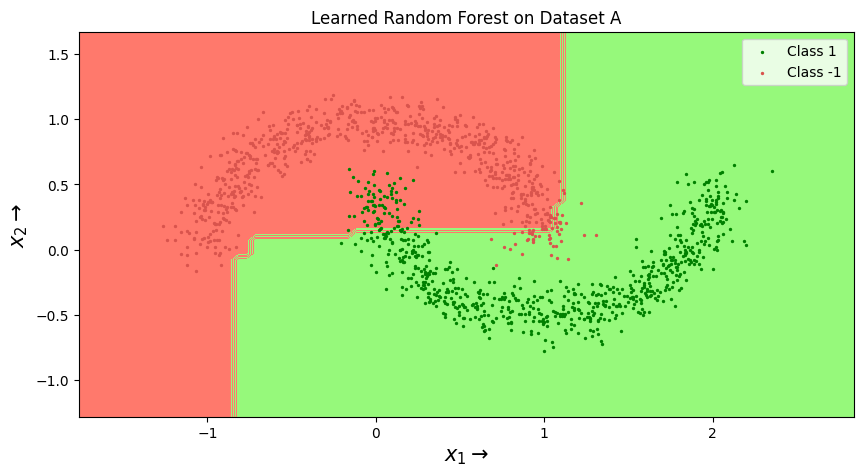

<Figure size 640x480 with 0 Axes>

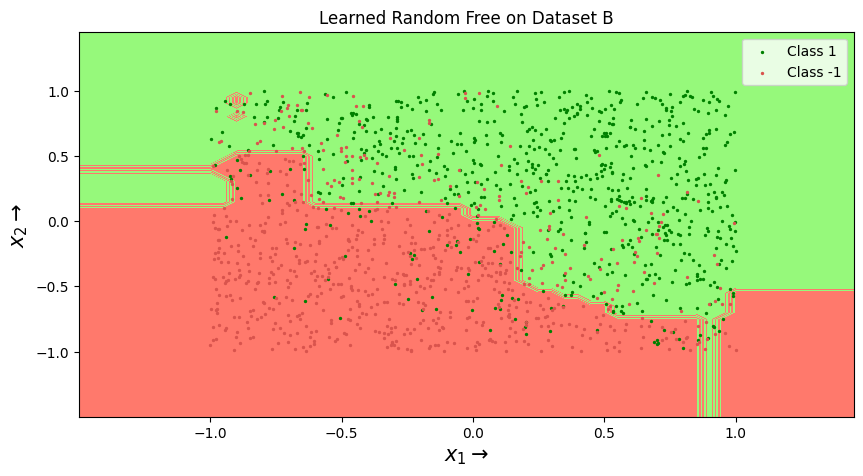

In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

data_A = np.load('../../Data/dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
forest = train_random_forest(X_train, Y_train, num_trees=15, criterion='accuracy')
pred_Y = eval_random_forest(forest, test_samples)

plt.figure(0)
f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(10,5))
ax1.contourf(X,Y,pred_Y.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Learned Random Forest on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()
plt.show()

data_B = np.load('../../Data/dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
forest = train_random_forest(X_train, Y_train, num_trees=20, criterion='accuracy')
pred_Y = eval_random_forest(forest, test_samples)
plt.figure(1)
f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(10,5))
ax1.contourf(X,Y,pred_Y.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Learned Random Free on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()
plt.show()

**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:
# Codewrite cell
# Write code to run here (no plotting)
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.feature_index = None
        self.class_label = 0
        self.class_sign = ""
        self.threshold=None
        self.stop_check=True

def depth_tree_by_accuracy(X_train, Y_train, weak_learner_depth,weight_vector):
    root = Node()
    if weak_learner_depth<=0 or X_train.shape[0]==0:
        label=0
        for i in range(Y_train.shape[0]):
            label+=Y_train[i] * weight_vector[i]
        if label==0:
            root.class_label=1
        else:
            root.class_label=np.sign(label)
        return root
    else:
        threshold, split_feature_index, accuracy = 0, 0, 0
        sign=""
        for i in range(X_train.shape[1]):
            mini, maxi = X_train[:, i].min(), X_train[:, i].max()
            j = np.linspace(mini, maxi, num=10)
            for value in j:
                weight_left = weight_vector[X_train[:,i]<=value]
                weight_right = weight_vector[X_train[:,i]>value]
                Y_left = Y_train[X_train[:,i]<=value]
                Y_right = Y_train[X_train[:,i]>value]


                left_side_weight_accuracy = (np.sum(weight_left[Y_left == -1]) + np.sum(weight_right[Y_right == 1])) / np.sum(weight_vector)
                right_side_weight_accuracy = (np.sum(weight_left[Y_left == 1]) + np.sum(weight_right[Y_right == -1])) / np.sum(weight_vector)

                if left_side_weight_accuracy > accuracy:
                    threshold = value
                    accuracy = left_side_weight_accuracy
                    split_feature_index = i
                    sign="lesser"

                if right_side_weight_accuracy > accuracy:
                    threshold = value
                    accuracy = right_side_weight_accuracy
                    split_feature_index=i
                    sign="greater"
        root.feature = split_feature_index
        root.threshold = threshold
        X_left_node = X_train[X_train[:, split_feature_index] <= threshold]
        Y_left_node = Y_train[X_train[:, split_feature_index] <= threshold]
        X_right_node = X_train[X_train[:, split_feature_index] > threshold]
        Y_right_node = Y_train[X_train[:, split_feature_index] > threshold]
        weight_left_node = weight_vector[X_train[:, split_feature_index] <= threshold]
        weight_right_node = weight_vector[X_train[:, split_feature_index] > threshold]
        root.left=depth_tree_by_accuracy(X_left_node,Y_left_node,weak_learner_depth-1,weight_left_node)
        root.right=depth_tree_by_accuracy(X_right_node,Y_right_node,weak_learner_depth-1,weight_right_node)
        root.stop_check=False
        if root.left.stop_check==True:
            if sign=="lesser":
              root.left.class_label=-1
            else:
              root.left.class_label=+1
        if root.right.stop_check==True:
            if sign=="lesser":
              root.right.class_label=+1
            else:
              root.right.class_label=-1
        return root

def train_decision_tree(X, Y, weak_learner_depth=1,):
    return depth_tree_by_accuracy(X, Y, weak_learner_depth)

def eval_decision_tree(tree, test_X):
    Y_prediction = np.zeros(test_X.shape[0])
    for i in range(test_X.shape[0]):
        root = tree
        while (root.stop_check==False):
            if test_X[i, root.feature] <= root.threshold:
                root = root.left
            else:
                root = root.right
        Y_prediction[i] = root.class_label
    return Y_prediction

def beta_val(gamma):
    if abs(0.5 - gamma) < 1e-6:  # Check if gamma is very close to 0.5
        beta_current = float('inf')  # Set beta_current to infinity or any other suitable value
    else:
        beta_current = (0.5 + gamma) / (0.5 - gamma)
    return beta_current

def ada_boost(X_train,Y_train,weak_learner_depth,iteration):
    weight_vector=np.ones(X_train.shape[0],dtype='int')
    l_t=np.zeros(X_train.shape[0],dtype='int')
    weak_learn_H=[]
    beta_parameters=[]
    if(weak_learner_depth==1):
        for i in range (iteration):
            tree =  depth_tree_by_accuracy(X_train,Y_train,1,weight_vector)
            predicted_Y_weak = eval_decision_tree(tree,X_train)
            gamma = 0.5- ((np.dot(weight_vector,np.abs(predicted_Y_weak - Y_train)/2))/np.sum(weight_vector))
            beta_current=beta_val(gamma)
            l_t = np.abs(predicted_Y_weak - Y_train)/2
            for i in range(weight_vector.shape[0]):
                weight_vector[i]=np.ceil(weight_vector[i]*pow(beta_current,l_t[i]))
            beta_parameters.append(beta_current)
            weak_learn_H.append(tree)
        return weak_learn_H , beta_parameters
    elif(weak_learner_depth==3):
        for i in range (iteration):
            tree =  depth_tree_by_accuracy(X_train,Y_train,3,weight_vector)
            predicted_Y_weak = eval_decision_tree(tree,X_train)
            gamma = 0.5- ((np.dot(weight_vector,np.abs(predicted_Y_weak - Y_train)/2))/np.sum(weight_vector))
            beta_current=beta_val(gamma)
            l_t = np.abs(predicted_Y_weak - Y_train)/2
            for i in range(weight_vector.shape[0]):
                weight_vector[i]=np.ceil(weight_vector[i]*pow(beta_current,l_t[i]))
            beta_parameters.append(beta_current)
            weak_learn_H.append(tree)
        return weak_learn_H ,beta_parameters
    else:
        for i in range (iteration):
            tree =  depth_tree_by_accuracy(X_train,Y_train,7,weight_vector)
            predicted_Y_weak = eval_decision_tree(tree,X_train)
            gamma = 0.5- ((np.dot(weight_vector,np.abs(predicted_Y_weak - Y_train)/2))/np.sum(weight_vector))
            beta_current=beta_val(gamma)
            l_t = np.abs(predicted_Y_weak - Y_train)/2
            for i in range(weight_vector.shape[0]):
                weight_vector[i]=np.ceil(weight_vector[i]*pow(beta_current,l_t[i]))
            beta_parameters.append(beta_current)
            weak_learn_H.append(tree)
        return weak_learn_H , beta_parameters
def eval_boost(beta_s,weak_leaner_H,X_test):
    Y_predicted = np.zeros(X_test.shape[0])
    for i in range(len(beta_s)):
        Y_predicted = Y_predicted + np.log(beta_s[i])*eval_decision_tree(weak_leaner_H[i],X_test)
    Y_predicted = np.sign(Y_predicted)
    return Y_predicted

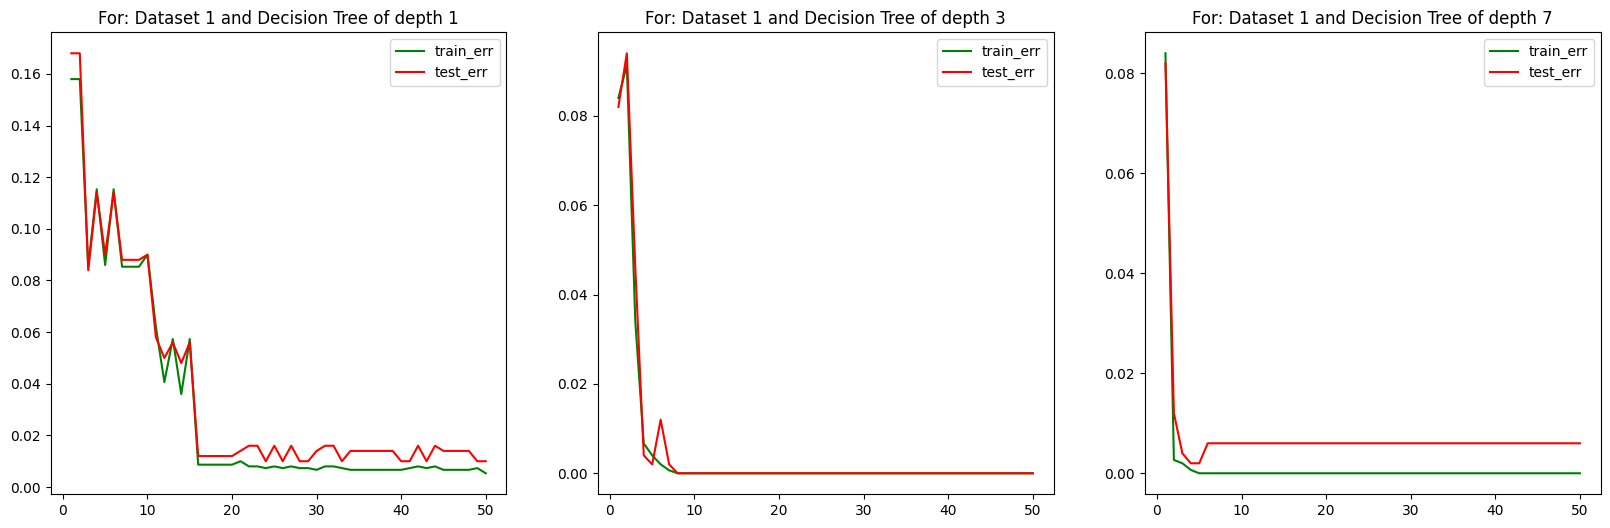

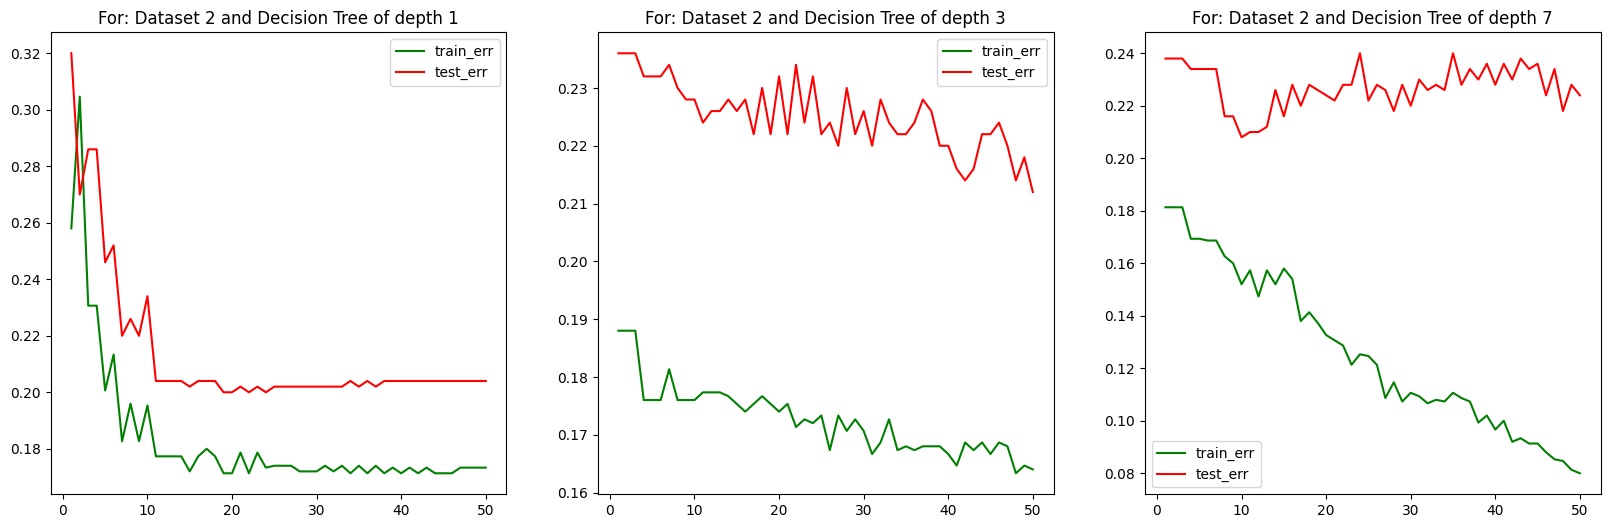

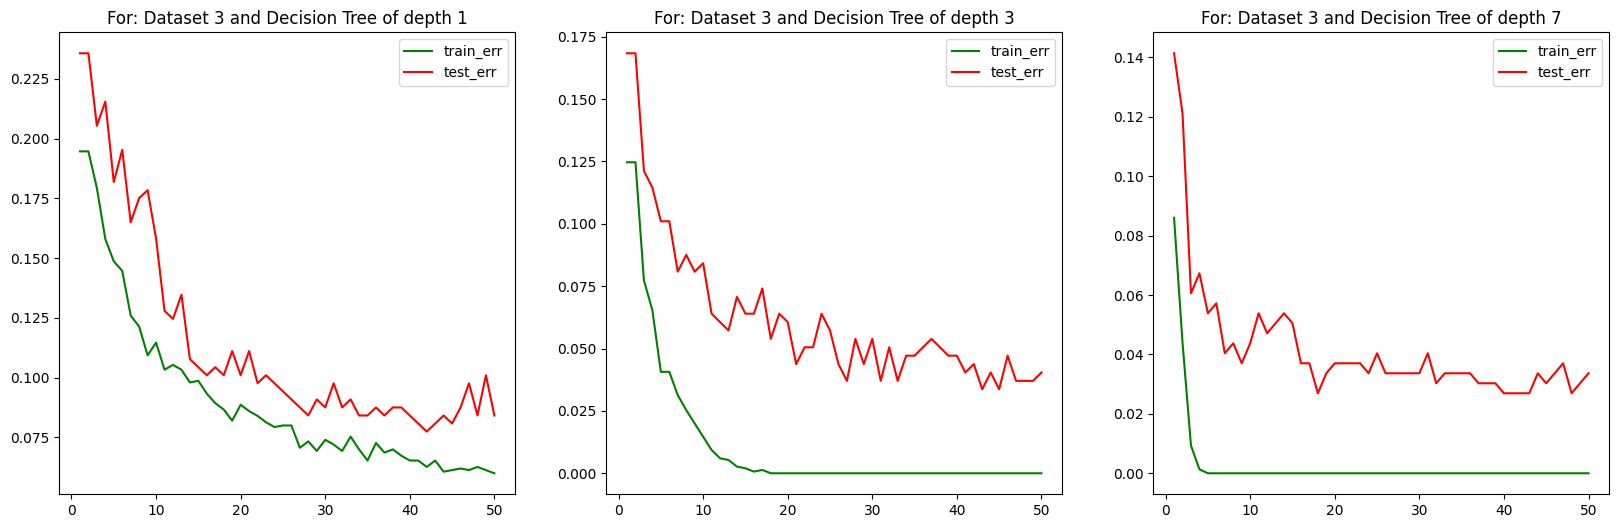

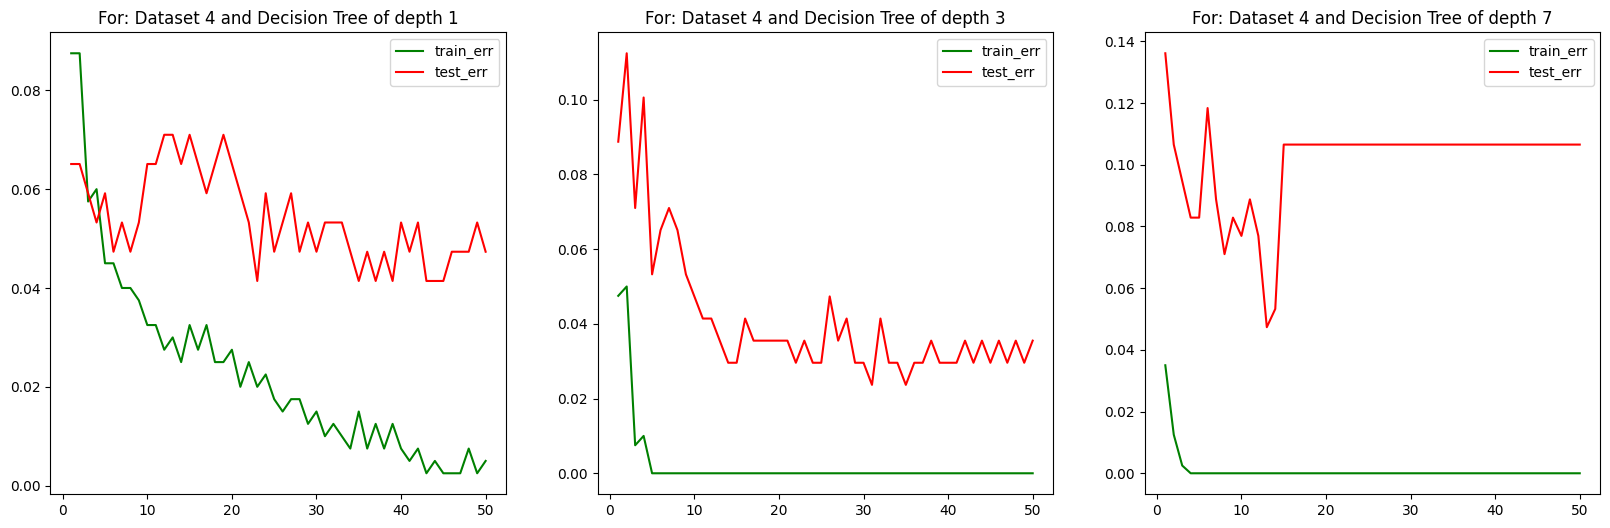

In [ ]:
# Codewrite cell
# Plots for iteration vs error here
dataset = ["../../Data/dataset_A.npz","../../Data/dataset_B.npz", "../../Data/dataset_C.npz","../../Data/dataset_D.npz"]
for dataset_index, dataset_path in enumerate(dataset):
    data = np.load(dataset_path)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    iteration = 50
    weak_learner_depth = [1, 3, 7]
    plt.figure(figsize=(20, 6))
    predicted_Y_test = np.zeros(Y_test.shape[0])
    predicted_Y_train = np.zeros(Y_train.shape[0])
    train_err = []
    test_err = []
    for depth_index, depth in enumerate(weak_learner_depth):
        weak_H, beta_s = ada_boost(X_train, Y_train, depth, iteration)
        predicted_Y_test = np.zeros(Y_test.shape[0])
        predicted_Y_train = np.zeros(Y_train.shape[0])
        training_error = []
        test_error = []
        for i in range(len(weak_H)):
            predicted_Y_test = predicted_Y_test + np.log(beta_s[i]) * eval_decision_tree(weak_H[i], X_test)
            predicted_Y_train = predicted_Y_train + np.log(beta_s[i]) * eval_decision_tree(weak_H[i], X_train)
            training_error.append(np.sum(np.abs(np.sign(predicted_Y_train) - Y_train) / 2) / len(Y_train))
            test_error.append(np.sum(np.abs(np.sign(predicted_Y_test) - Y_test) / 2) / len(Y_test))
        plt.subplot(1, 3, depth_index + 1)
        plt.title("For: Dataset {} and Decision Tree of depth {}".format(dataset_index + 1, depth))
        plt.plot(range(1, iteration + 1), training_error, 'g')
        plt.plot(range(1, iteration + 1), test_error, 'r')
        plt.legend(['train_err', 'test_err'])
    plt.show()


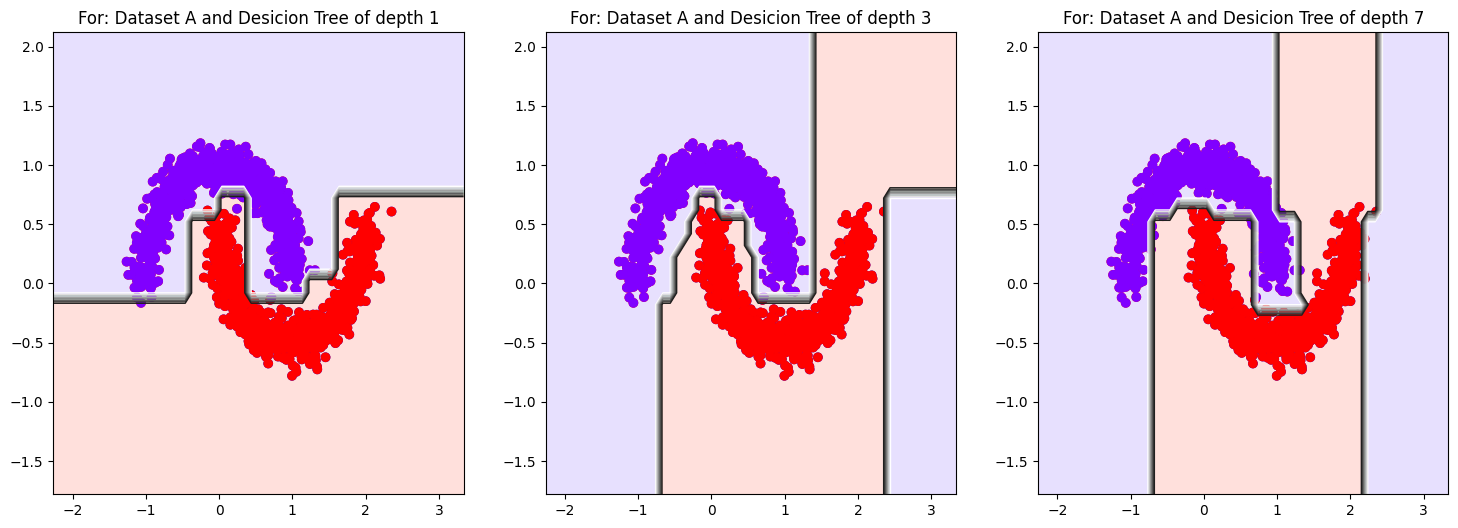

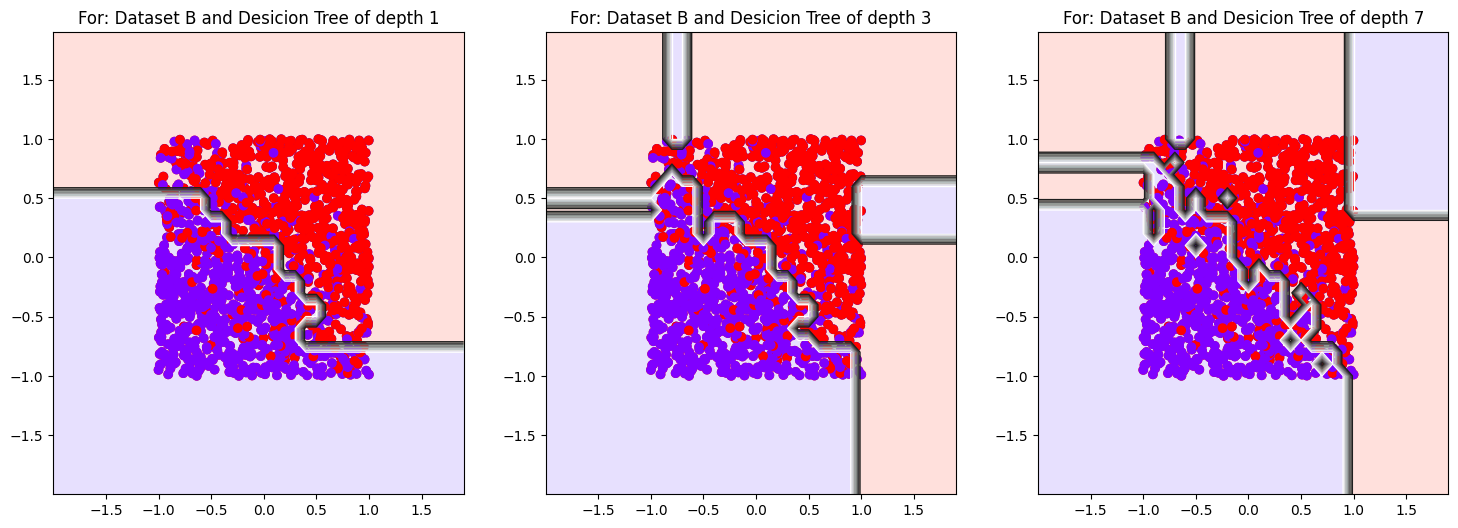

In [ ]:
for z in ["../../Data/dataset_A.npz", "../../Data/dataset_B.npz"]:
    data = np.load(z)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    X_min, X_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    Y_min, Y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1), np.arange(Y_min, Y_max, 0.1))
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1, r2))
    iteration = 50
    weak_learner_depth = [1, 3, 7]
    plt.figure(figsize=(18, 6))
    for depth in range(len(weak_learner_depth)):
        weak_H, beta_s = ada_boost(X_train, Y_train, weak_learner_depth[depth], iteration)

        Predicted = eval_boost(beta_s, weak_H, grid)
        plt.subplot(1, 3, depth + 1)
        plt.contourf(xx, yy, Predicted.reshape(xx.shape), alpha=0.15, cmap="rainbow")
        plt.contour(xx, yy, Predicted.reshape(xx.shape), alpha=1, cmap=plt.cm.binary, linewidths=1)
        plt.scatter(X_train.T[0], X_train.T[1], color=['red' if Y_train[j] == -1 else 'blue'
                                                       for j in range(len(X_train))])
        plt.scatter(X_train.T[0], X_train.T[1], c=Y_train, cmap="rainbow")
        plt.title("For: Dataset {} and Desicion Tree of depth {}".format("A" if z == "Data/dataset_A.npz" else "B", weak_learner_depth[depth]))
    plt.show()


**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [7]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [15]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w

data=np.load('../../Data/LassoReg_data.npz')
X=data['arr_0']
Y=data['arr_1']

train_size = int(0.5 * X.shape[0])
val_size = int(0.25 * X.shape[0])

X_train,X_val,X_test=X[:train_size], X[train_size:train_size+val_size],X[train_size+val_size:]
Y_train,Y_val,Y_test=Y[:train_size], Y[train_size:train_size+val_size],Y[train_size+val_size:]


def mean_squared_error(y_true, y_pred):
    # Ensure y_true and y_pred are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate squared differences
    squared_errors = (y_true - y_pred) ** 2

    # Calculate mean squared error
    mse = np.mean(squared_errors)
    return mse

def get_gradient(w):
    return np.dot(np.dot(X_train.T, X_train),w) - np.dot(X_train.T,Y_train)

In [ ]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.


best_model = None
best_val_mse = np.inf
best_l1_norm= 0
best_learning=0

learning_rates = [0.0001, 0.001, 0.1,1]
l1_norms = [2,4,8,16]
def lasso_regression(X_train,Y_train,l1_norm,learning_rate):
  #w = np.zeros(X_train.shape[1])
    w=np.random.randn(X_train.shape[1])
    for i in range (50):
        w=w-learning_rate*get_gradient(w)
        w=projection_oracle_l1(w,l1_norm)
    return w
# Also write code for doing validation of the learned model using the validation set
for rd in learning_rates:
    for radius in l1_norms:
        w = lasso_regression(X_train, Y_train,radius,rd)  # Set max_iter to avoid potential non-convergence
        val_pred = np.dot(X_val, w)
        val_mse = mean_squared_error(Y_val, val_pred)
        if val_mse < best_val_mse:
            best_model = w
            best_val_mse = val_mse
            best_l1_norm = rd
            best_learning=radius
  # Evaluate test performance and report results
test_pred = np.dot(X_test, best_model)
test_mse = mean_squared_error(Y_test,test_pred)

# Top 10 feature indices and values (absolute value sorting)
top_10_indices = np.argsort(abs(best_model))[-1:-11:-1]
top_10_weights = best_model[top_10_indices]

#Print results
# print(f"For L1_norm : {rd}")
# print(f"Test MSE: {test_mse}")
# print(f"Top 10 Feature Indices: {top_10_indices}")
# print(f"Top 10 Feature Weights: {top_10_weights}")
# print("<-------------------->")
# print()


 the best parameter we get minimize MSE error on Test set of 25% by validate on 25% ratio data that was train on remaining 50% are as:

<b>Run for 50 iteration:</b>

L1_norm : 1

Test MSE: 0.3188408321779866

Top 10 Feature Indices: [107 904 766 390 320 237 762  79 438 160]

Top 10 Feature Weights: [ 0.5890488  -0.13401819 -0.09381828  0.08248041 -0.06917618  0.06861195
 -0.0628257   0.06215213  0.05358184 -0.05348188]


<b>Run for 100 iteration:</b>

 L1_norm : 1

Test MSE: 0.17771405061313067

Top 10 Feature Indices: [107 390 762 237 195 766  79 760  99 876]

Top 10 Feature Weights: [ 0.73713521  0.13274303 -0.08712341  0.08020849  0.05909449 -0.05013767
  0.04506975 -0.03684397 -0.0277482   0.02768483]

<b>Run for 500 iteration:</b>
 L1_norm : 1

Test MSE: 0.10286372348998978

Top 10 Feature Indices: [107 390 760 237 195 566 766 220 762 399]

Top 10 Feature Weights: [ 0.82672797  0.1689369  -0.07242937  0.0631641   0.05976283  0.04473554
 -0.04377597 -0.03623807 -0.03523597 -0.03258092]



<b>Run the lasso for 1000 itration:</b>
 L1_norm : 1

Test MSE: 0.10251211108824364

Top 10 Feature Indices: [107 390 760 237 705 195 762 766 718 438]

Top 10 Feature Weights: [ 0.83391596  0.1610749  -0.06898153  0.064398    0.04838474  0.04553973
 -0.0328992  -0.03213257  0.0319094   0.03139142]

 <b>Run for 2000 iteration got :</b>
L1_norm : 1

Test MSE: 0.09626221176610862

Top 10 Feature Indices: [107 390 760 237 762 195 766  79 912 764]

Top 10 Feature Weights: [ 0.8187654   0.17306295 -0.07020622  0.06344482 -0.0508322   0.04839987
 -0.03880539  0.03711786 -0.03226702 -0.0314056 ]